In [1]:
#This makes a subplot to visualize the images for one year

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.cm as cm
%matplotlib inline

df = pd.read_csv('../data/whistler_weather_good.csv')

dateTime = df['Date/Time']
year = df['Year']
month = df['Month']
day = df['Day']
maxT = df['Max Temp']
meanT = df['Mean Temp']
minT = df['Min Temp']
P = df['Total Precip (mm)']

firstDay = '2012-01-01'
finalDay = '2012-03-31'

indFirstDay = np.argwhere(dateTime==firstDay)
indFirstDay = indFirstDay[0][0]

indFinalDay = np.argwhere(dateTime==finalDay)
indFinalDay = indFinalDay[0][0]

inds = range(indFirstDay,indFinalDay+1)



plt.figure(figsize=[18,18])

s = 1 # Segment length
n = len(x)
rgb = cm.get_cmap(name='Reds',lut=n)

kk = 1
for ind in inds:
    currDay = dateTime[ind]
    prevDayInds = range(np.subtract(ind,30)+1,ind)
    
    x = [meanT[i] for i in prevDayInds]
    y = [P[i] for i in prevDayInds]
    
    if kk>0 and kk<101:
        
        ax=plt.subplot(10,10,kk)
        for i in range(0,n,s):
            plt.plot(x[i:i+s+1],y[i:i+s+1],color=rgb(i)[0:3])
            plt.xlim([xmin,xmax])
            plt.ylim([ymin,ymax])
            plt.title(currDay)
            
        
    kk+=1

plt.show()


NameError: name 'x' is not defined

c:\users\admin\appdata\local\programs\python\python36\lib\site-packages\matplotlib\cbook\deprecation.py:106: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  warnings.warn(message, mplDeprecation, stacklevel=1)


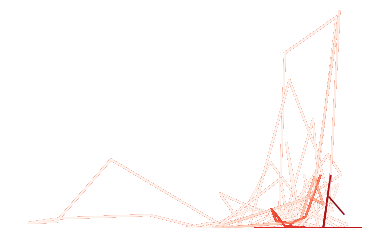

In [33]:
#This saves each individual image for one year only

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.cm as cm
%matplotlib inline

saveIt = True #if you want to save the images

df = pd.read_csv('../data/whistler_weather_good.csv')

dateTime = df['Date/Time']
year = df['Year']
month = df['Month']
day = df['Day']
maxT = df['Max Temp']
meanT = df['Mean Temp']
minT = df['Min Temp']
P = df['Total Precip (mm)']

ar = pd.read_csv('../data/avalanche_rating_Jan_to_Mar_2012_to_2017.csv')
areaOfWeather = 'Below Treeline'
avyDates = ar['Date']
avyRatings = ar[areaOfWeather]

firstDay = '2012-01-01'
finalDay = '2012-03-31'

indFirstDay = np.argwhere(dateTime==firstDay)
indFirstDay = indFirstDay[0][0]

indFinalDay = np.argwhere(dateTime==finalDay)
indFinalDay = indFinalDay[0][0]

inds = range(indFirstDay,indFinalDay+1)

xmin = np.nanmin([meanT[i] for i in inds])
xmax = np.nanmax([meanT[i] for i in inds])
ymin = np.nanmin([P[i] for i in inds])
ymax = np.nanmax([P[i] for i in inds])

s = 1 # Segment length
numPrevDays = 30
n = numPrevDays
rgb = cm.get_cmap(name='Reds',lut=n)

# Training / Validation Split
trainingPrptn = 0.75
validationPrptn = 0.25

assert (trainingPrptn + validationPrptn == 1.0), "Training/validation data split does not add up to 1.0"

# Create a random selection of images that will be used for validation
numSamples = len(dates)
validationSampleInds = np.random.choice(range(numSamples), int(numSamples*validationPrptn), replace=False) 
counter = 0

for ind in inds: #for each day
    
    currDay = dateTime[ind]
    prevDayInds = range(np.subtract(ind,30)+1,ind)
    
    x = [meanT[i] for i in prevDayInds]
    y = [P[i] for i in prevDayInds]
    
    plt.subplot(1,1,1)
    for i in range(0,n,s):
        plt.plot(x[i:i+s+1],y[i:i+s+1],color=rgb(i)[0:3])
        
    plt.xlim([xmin,xmax])
    plt.ylim([ymin,ymax])
    #plt.tick_params(bottom=False, labelbottom=False,)
    plt.axis('off')
    
    # sort images into directories labelled by the day's avalanche rating
    avyInd = np.argwhere(avyDates==currDay)[0][0]
    currAvyRating = avyRatings[avyInd]
    
    if counter in validationSampleInds:
        subDir = 'validation/AR-' + str(currAvyRating) +'/'
    else:
        subDir = 'train/AR-' + str(currAvyRating) +'/'
    
    counter += 1
        
    fileDir = '../data/temp_prec_images/' + areaOfWeather + '/' + subDir
    filename = 'temp_precip_prev' + str(numPrevDays) + '_Reds_' + currDay + '_AR-' + str(currAvyRating) + '.png'
    if saveIt is True:
        plt.savefig(fileDir+filename)

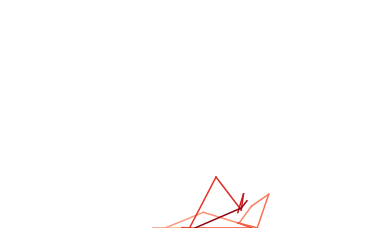

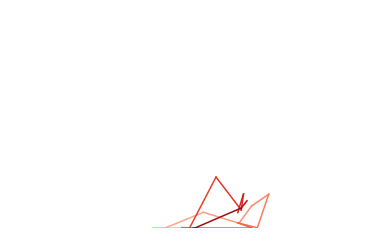

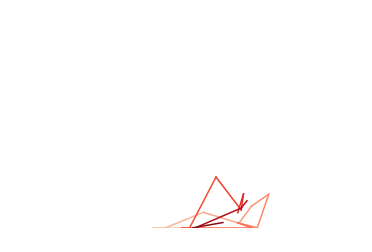

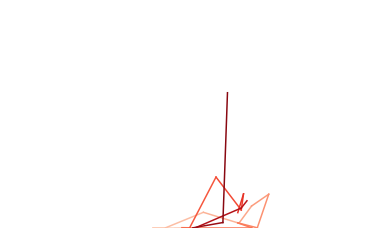

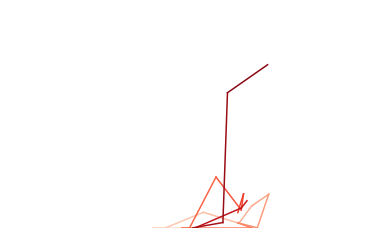

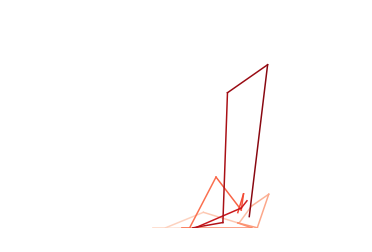

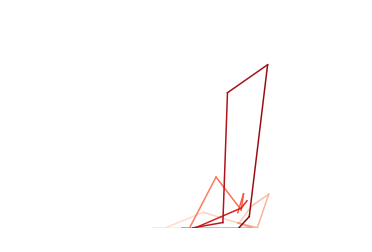

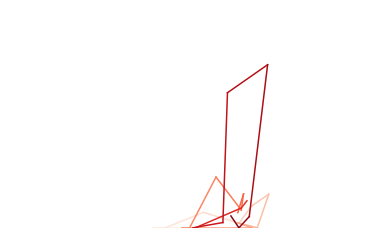

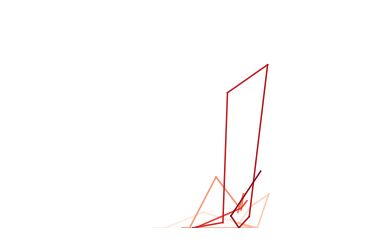

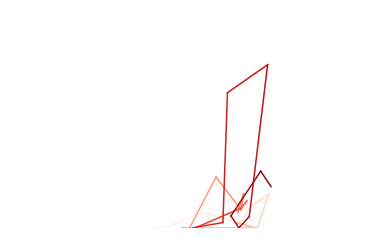

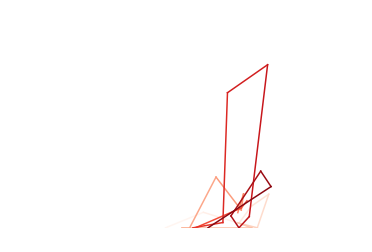

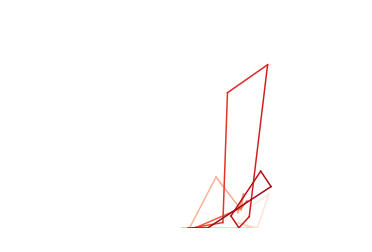

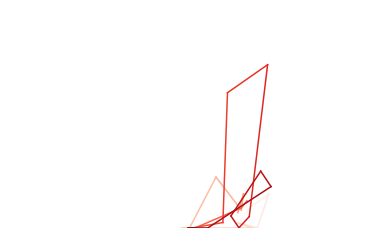

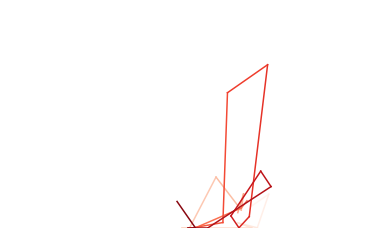

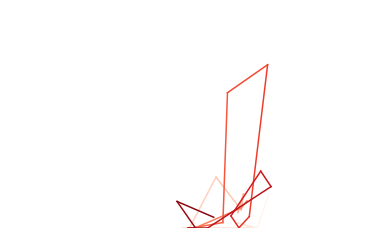

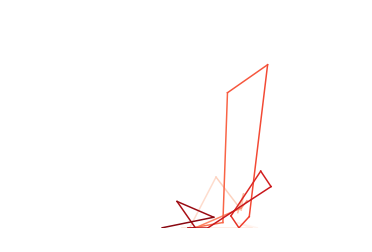

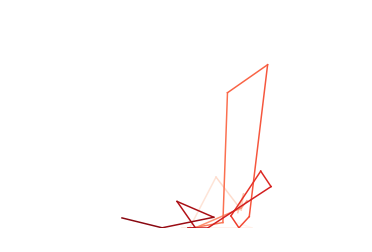

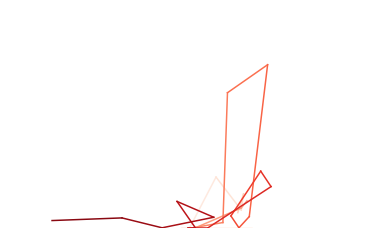

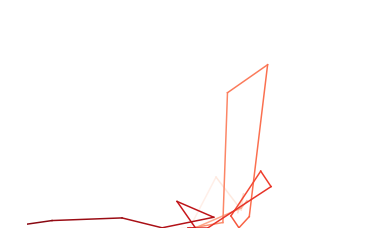

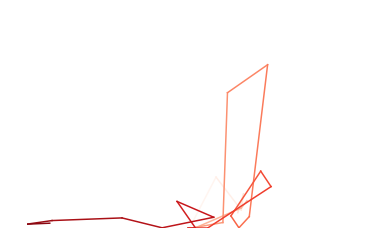

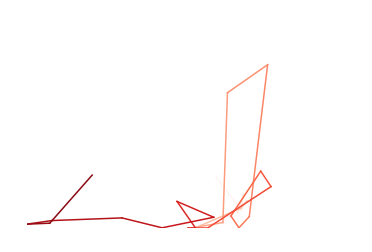

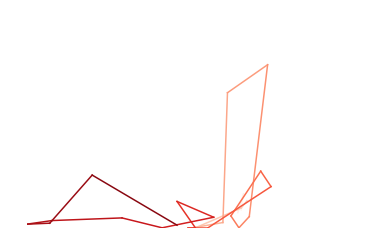

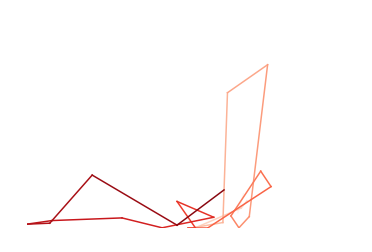

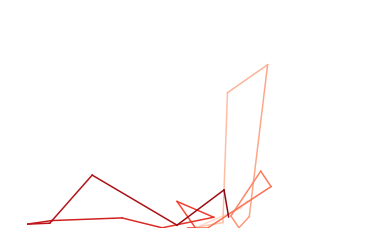

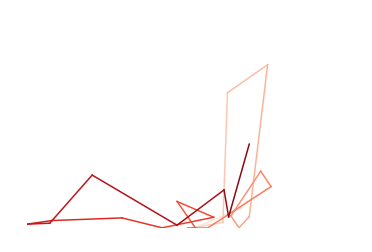

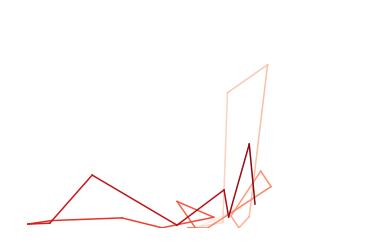

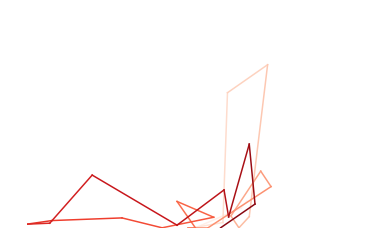

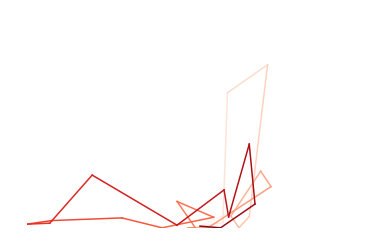

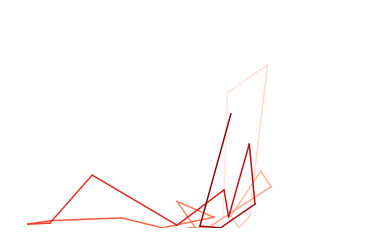

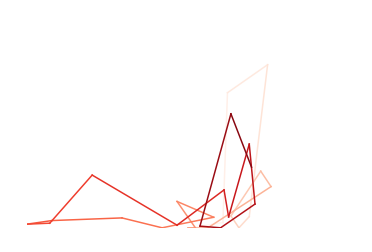

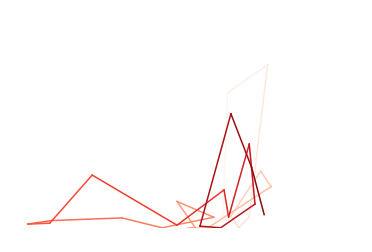

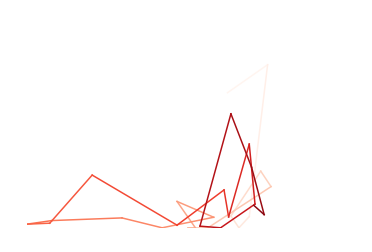

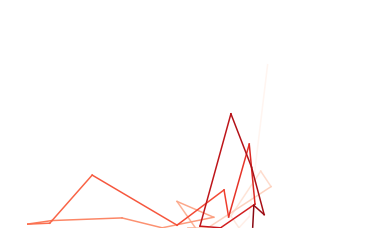

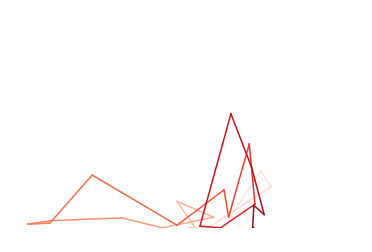

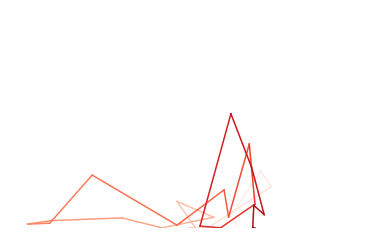

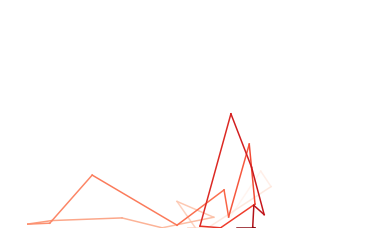

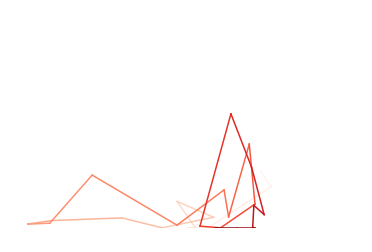

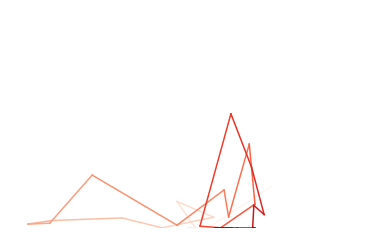

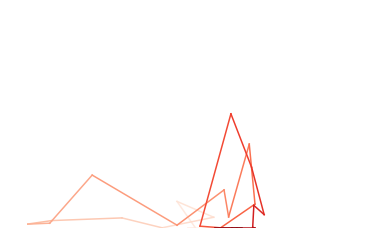

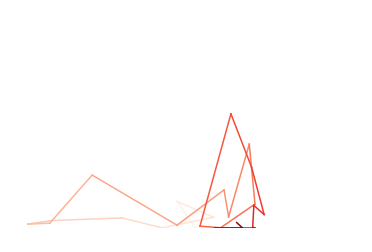

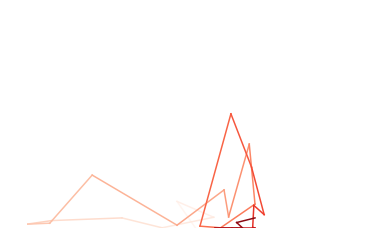

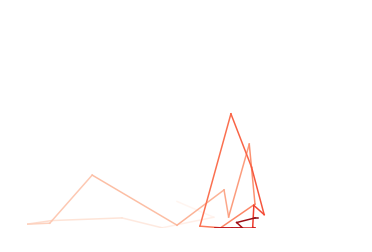

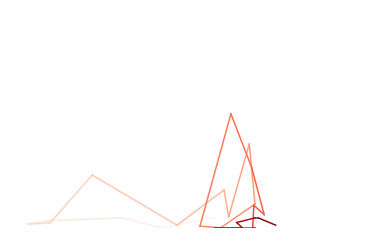

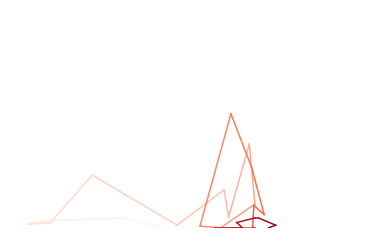

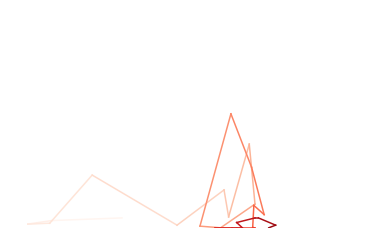

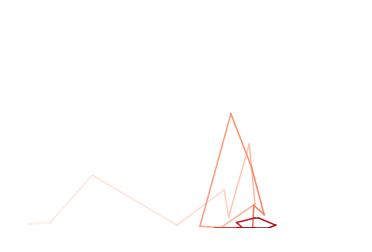

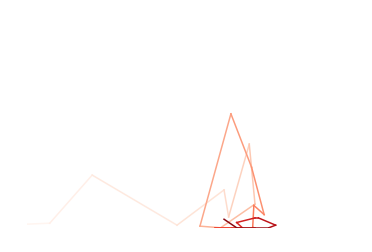

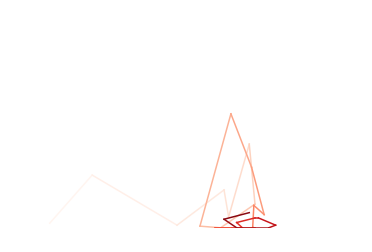

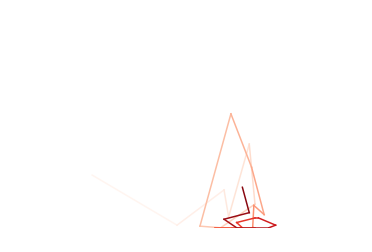

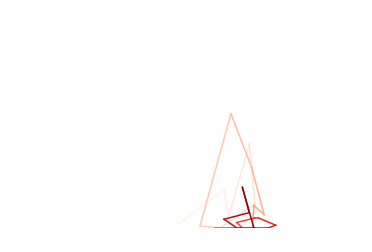

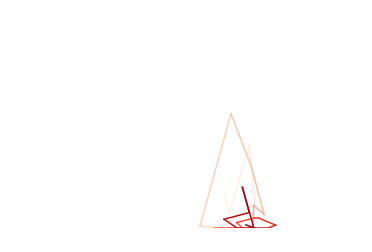

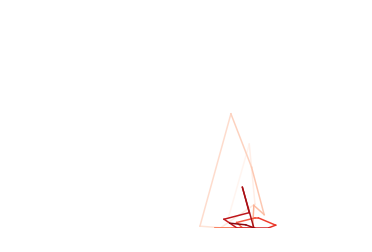

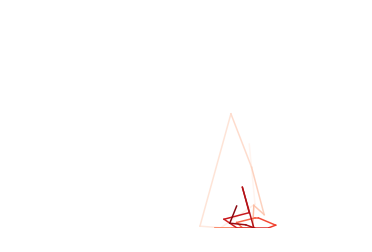

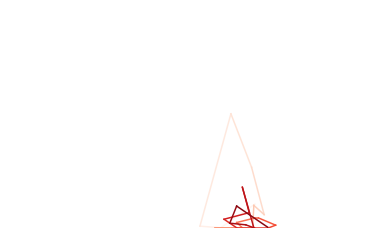

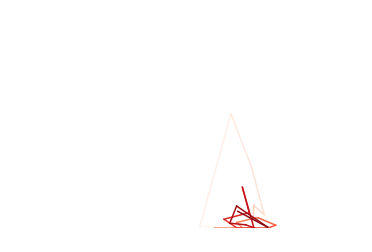

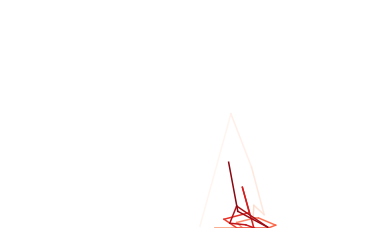

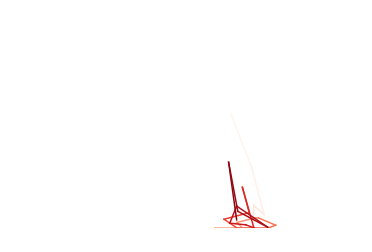

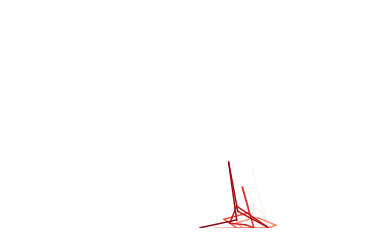

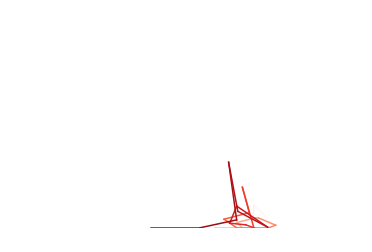

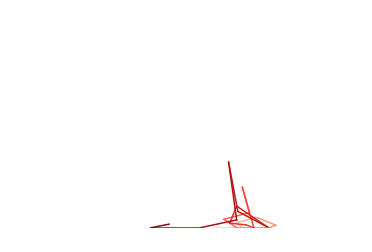

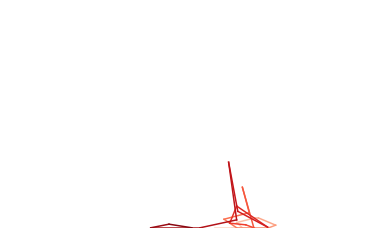

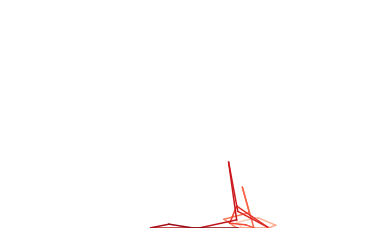

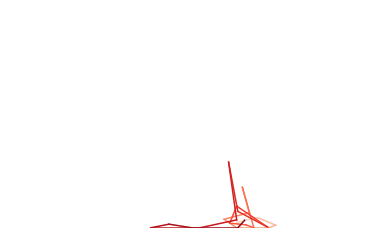

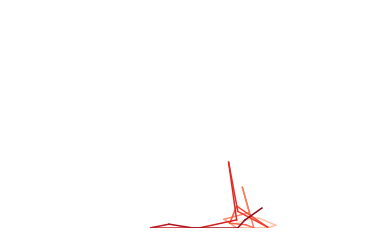

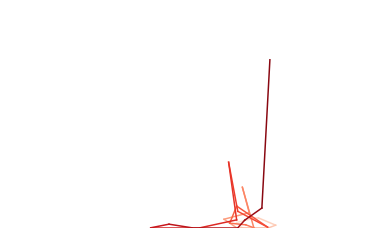

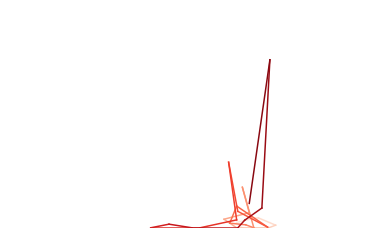

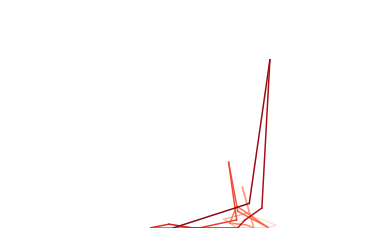

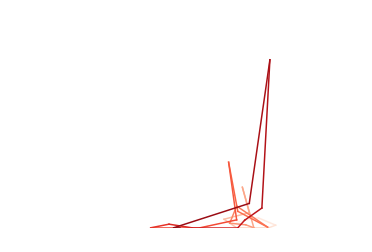

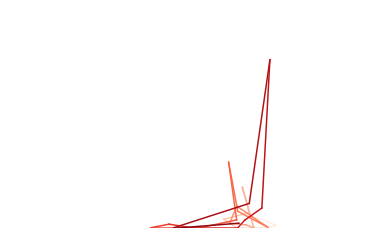

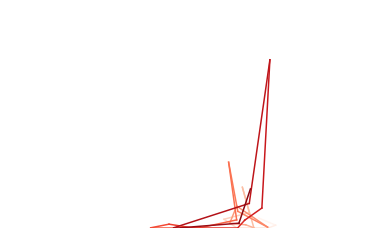

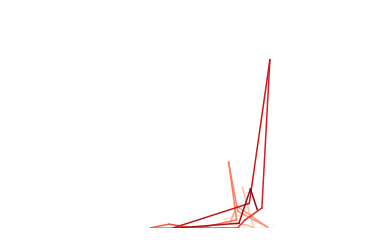

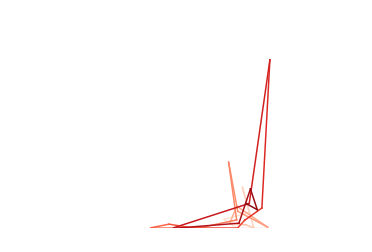

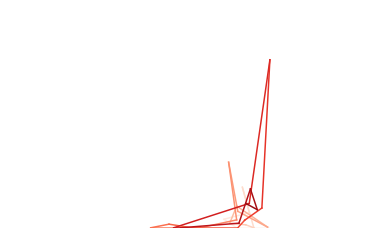

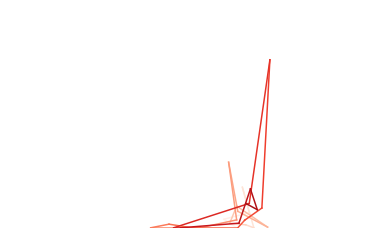

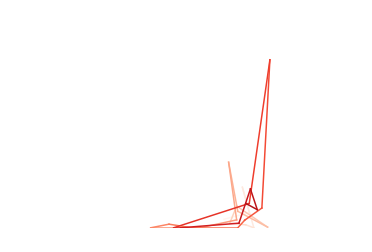

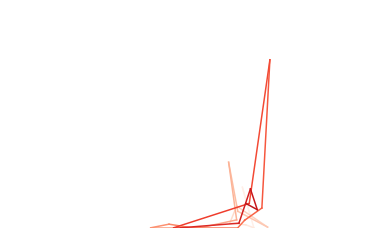

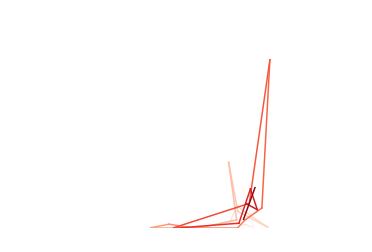

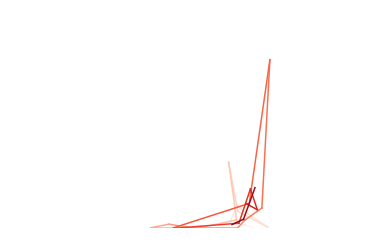

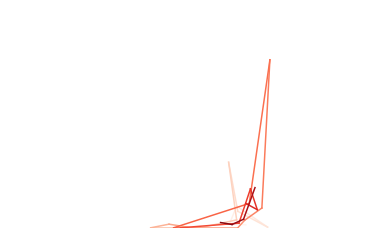

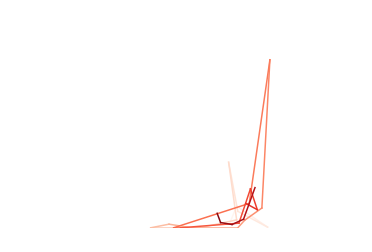

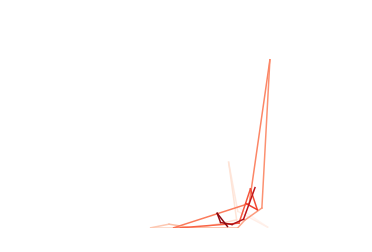

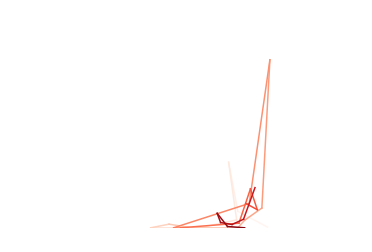

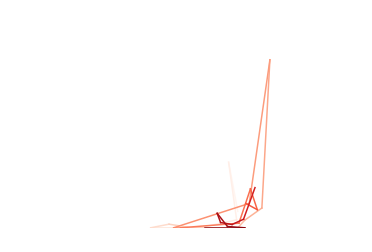

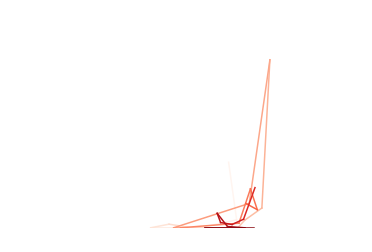

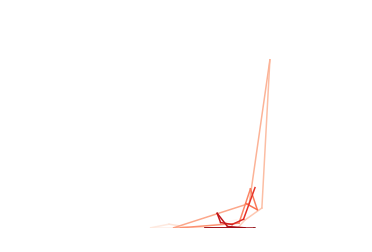

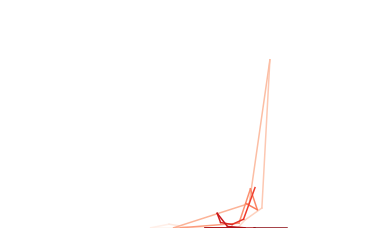

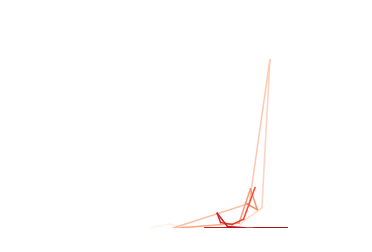

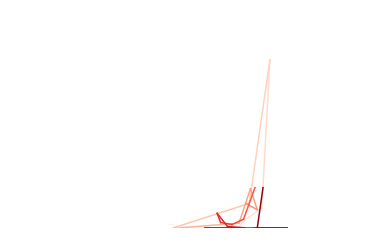

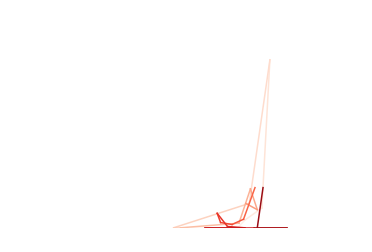

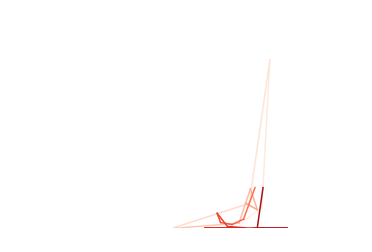

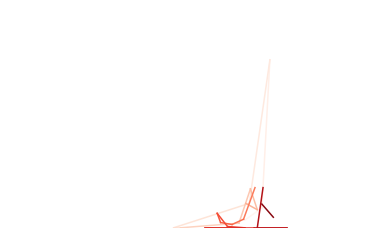

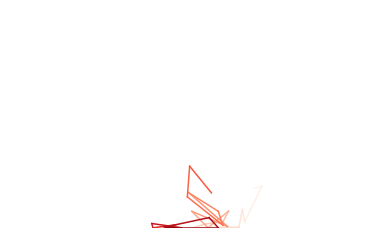

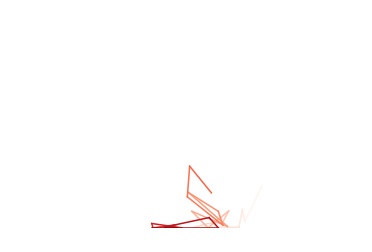

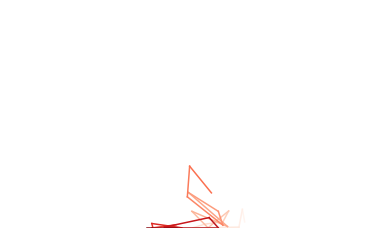

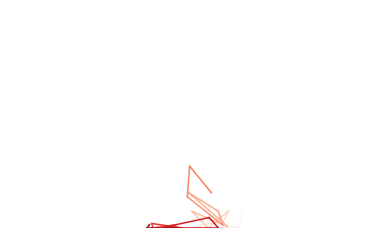

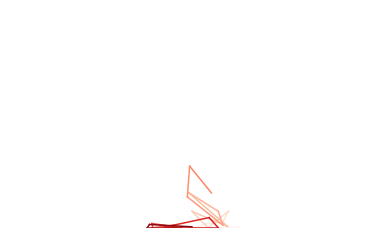

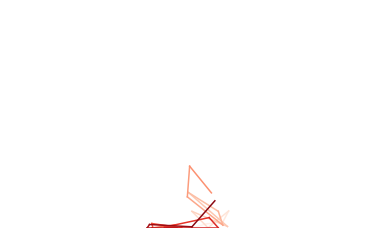

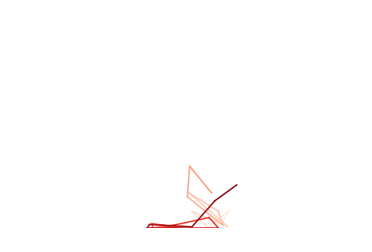

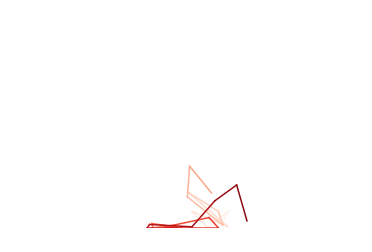

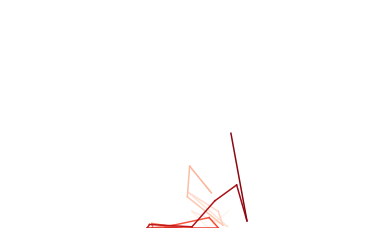

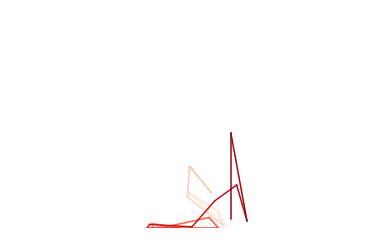

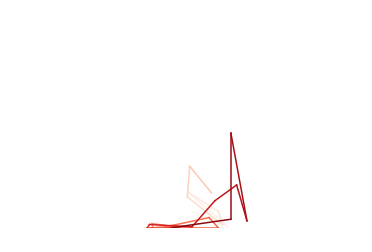

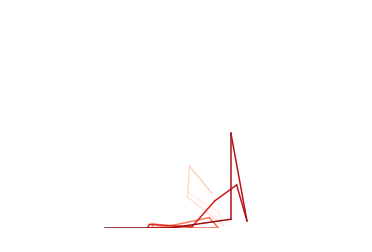

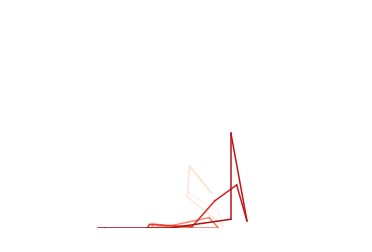

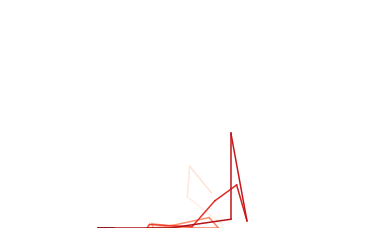

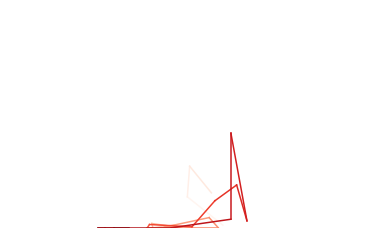

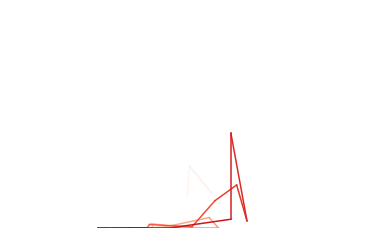

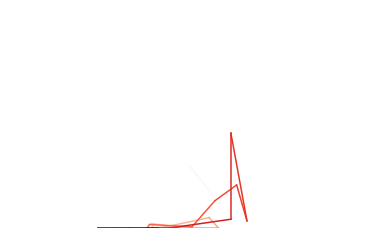

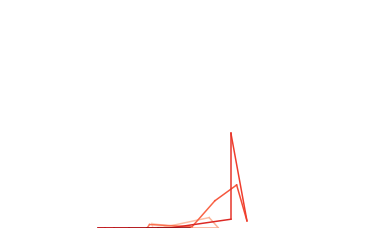

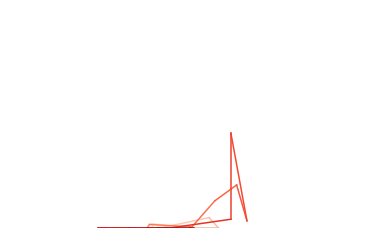

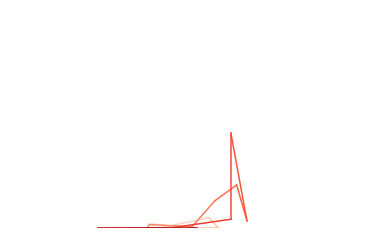

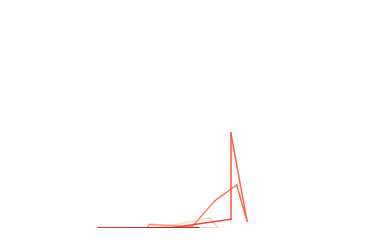

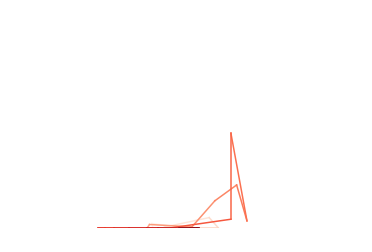

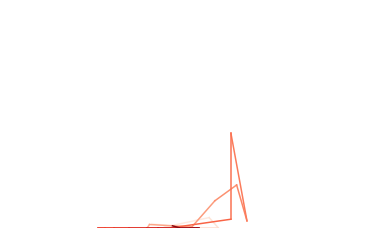

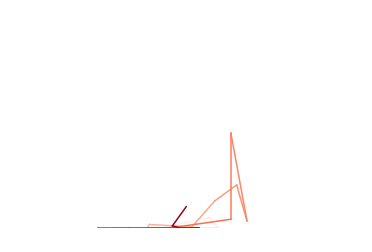

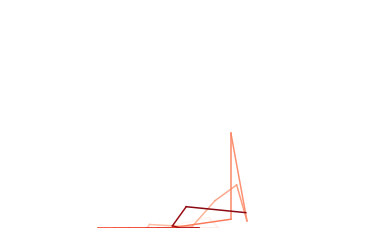

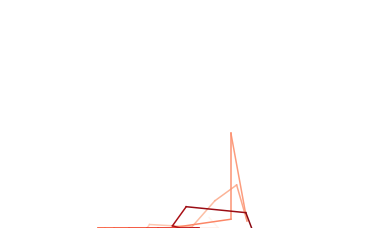

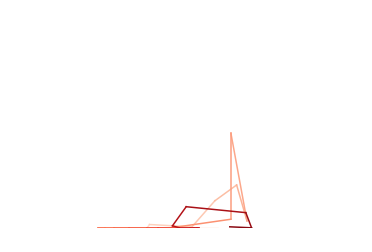

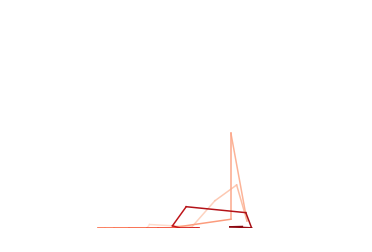

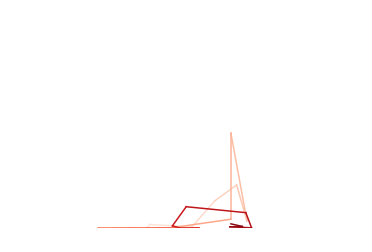

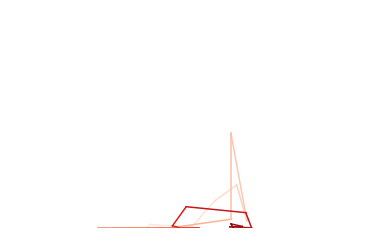

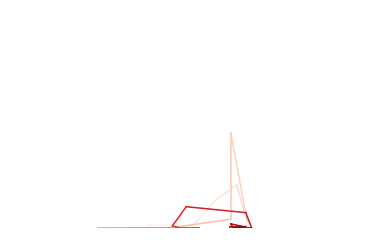

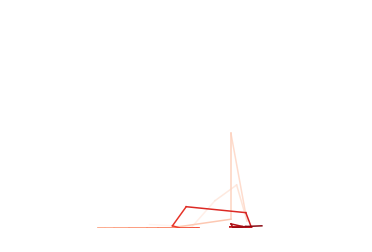

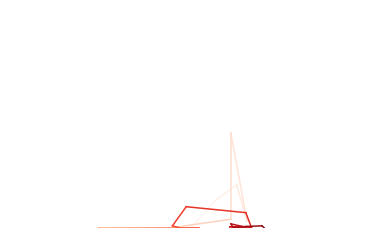

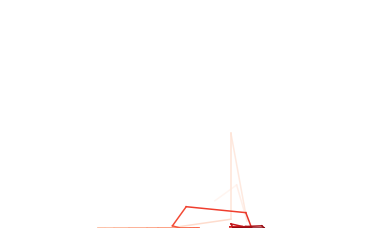

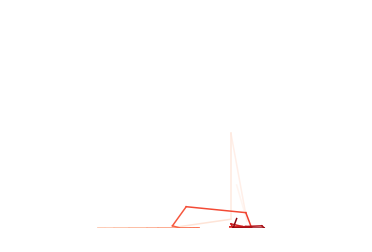

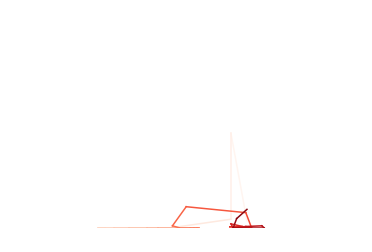

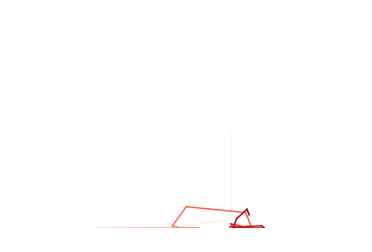

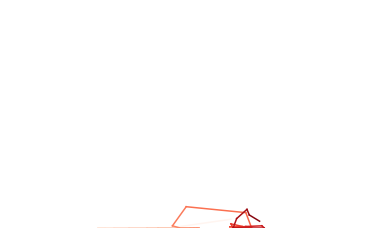

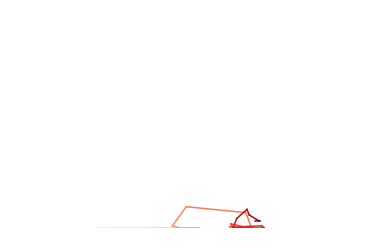

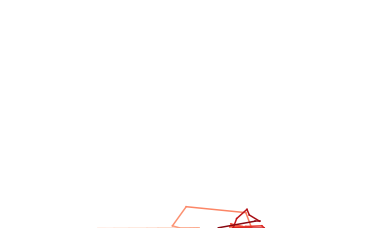

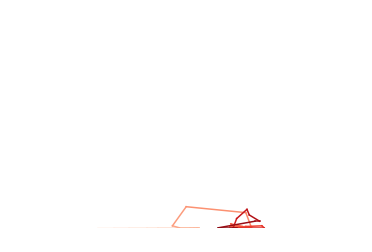

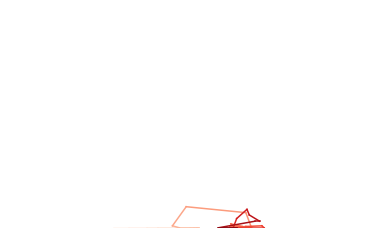

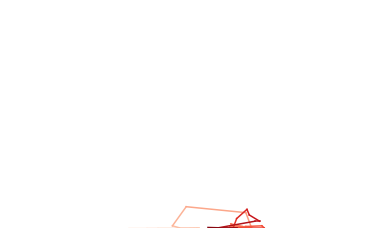

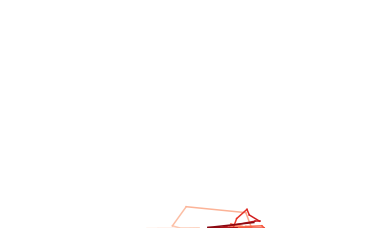

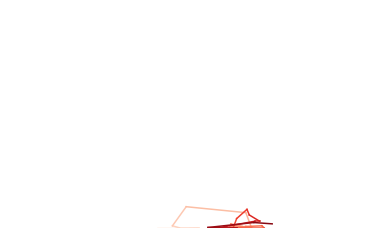

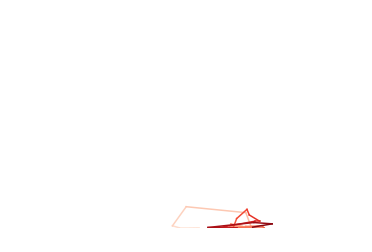

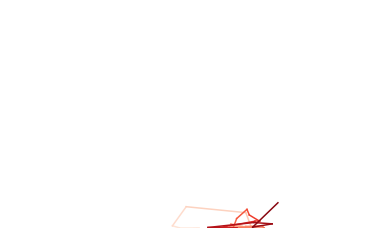

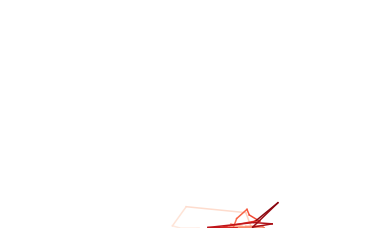

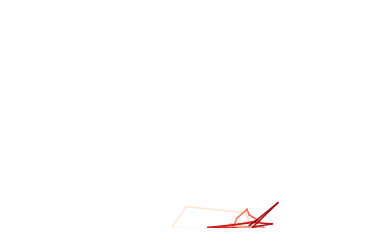

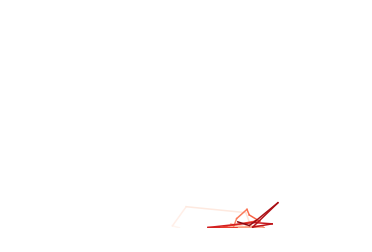

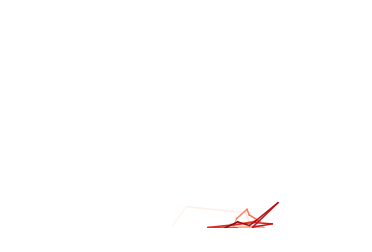

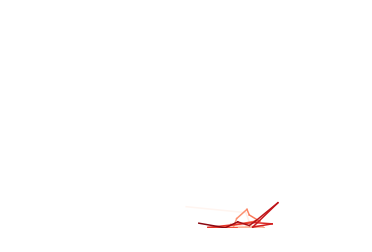

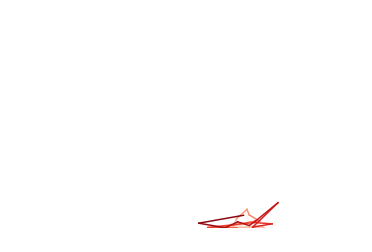

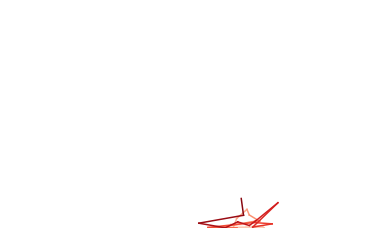

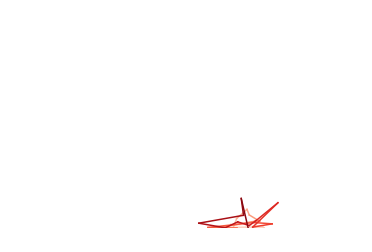

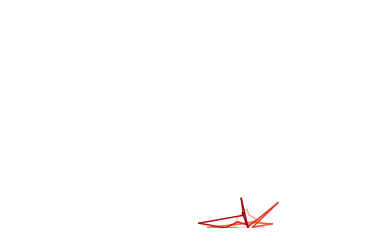

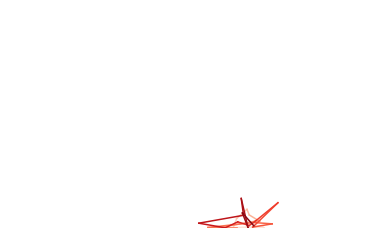

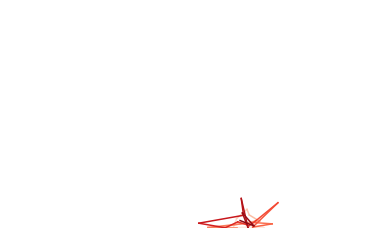

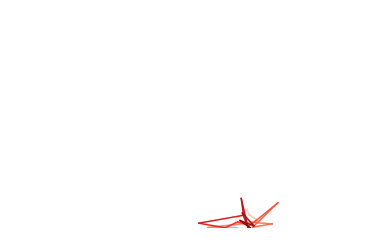

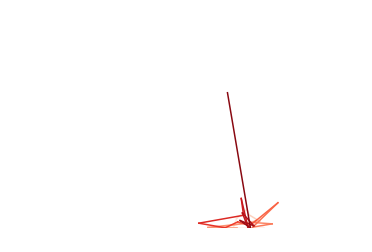

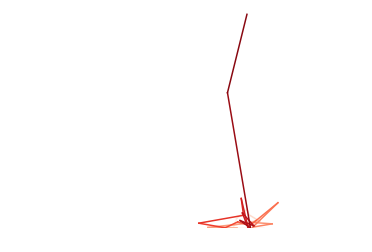

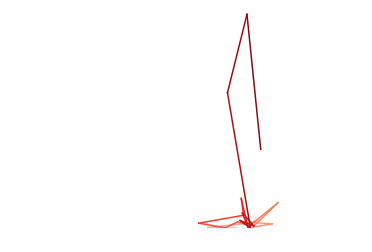

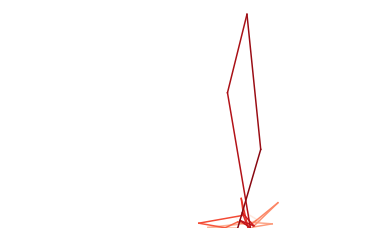

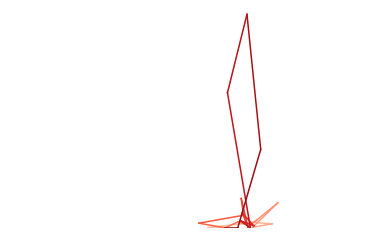

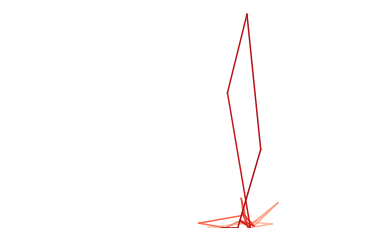

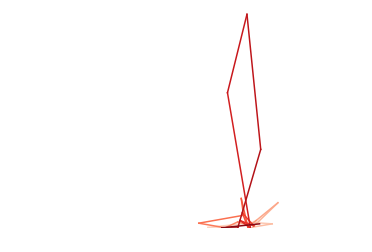

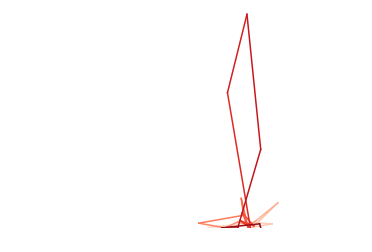

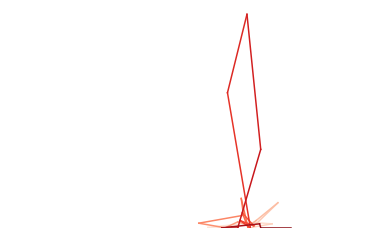

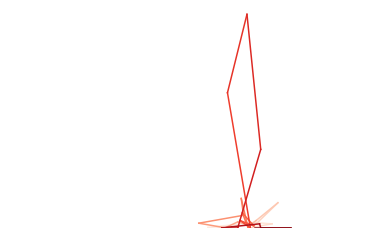

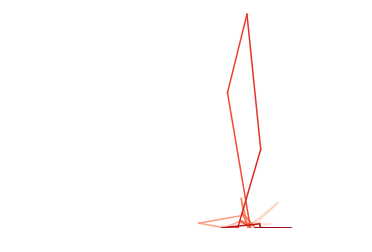

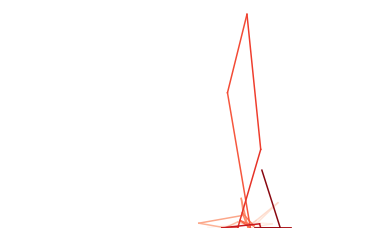

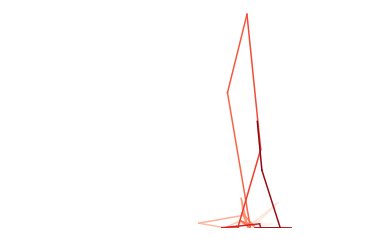

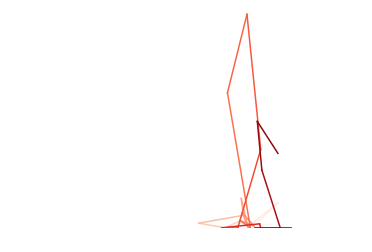

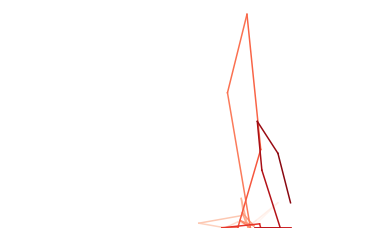

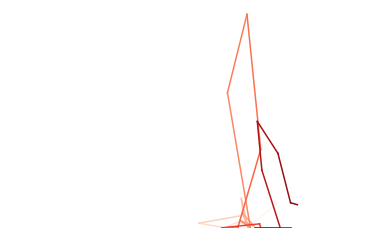

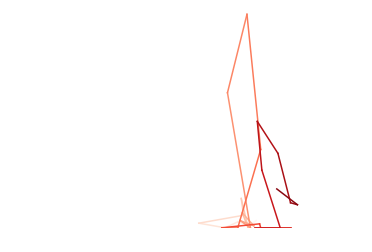

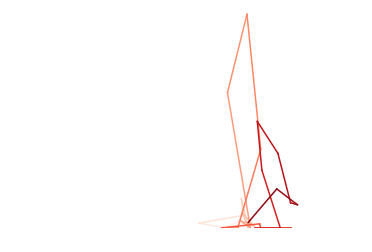

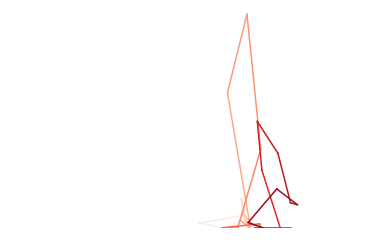

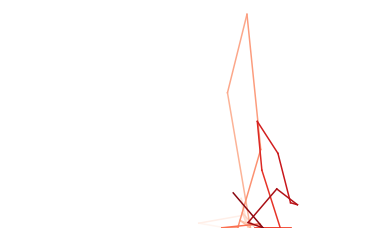

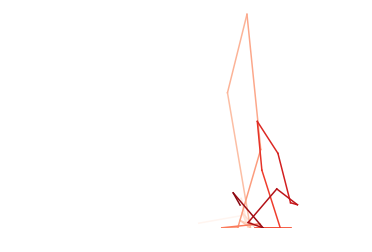

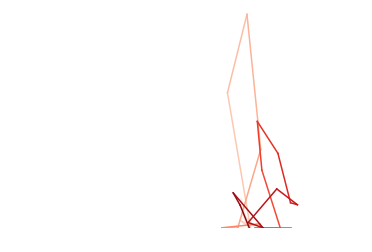

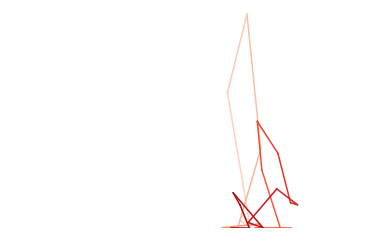

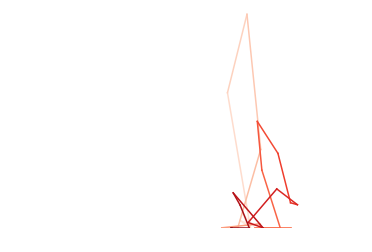

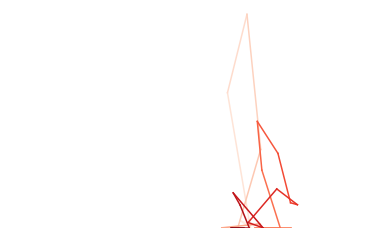

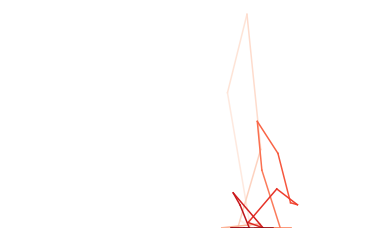

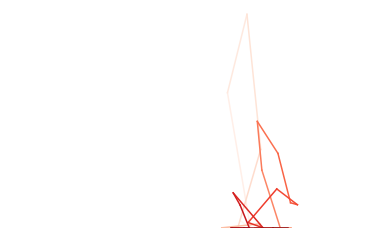

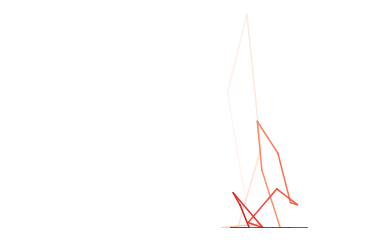

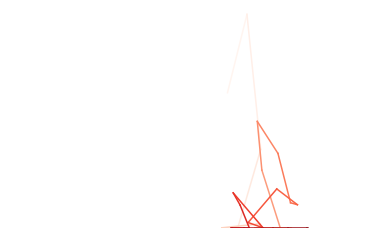

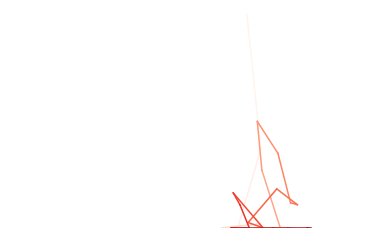

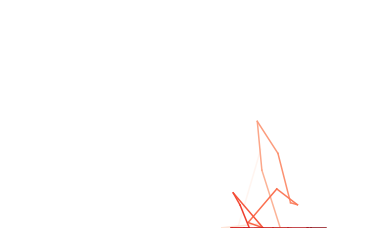

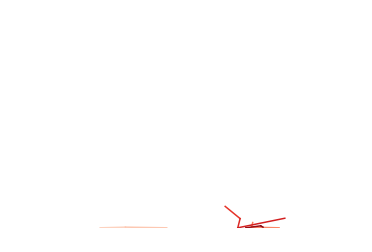

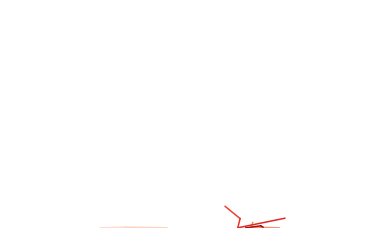

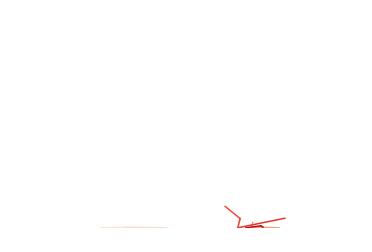

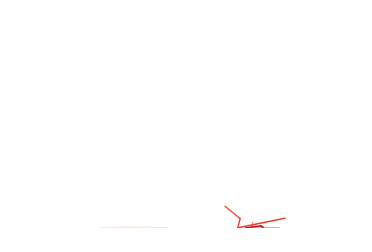

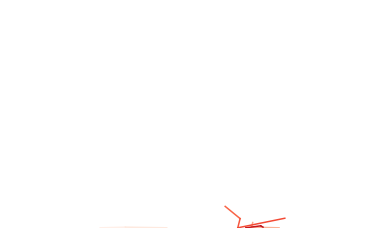

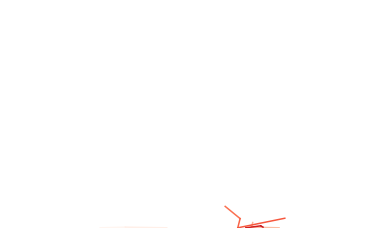

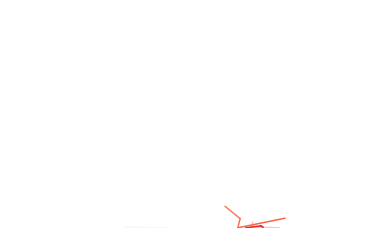

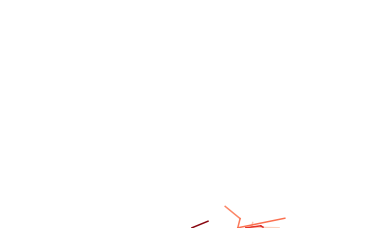

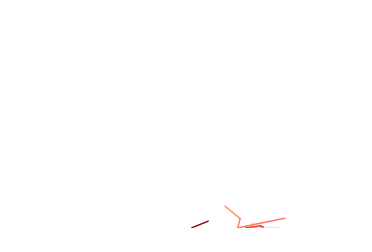

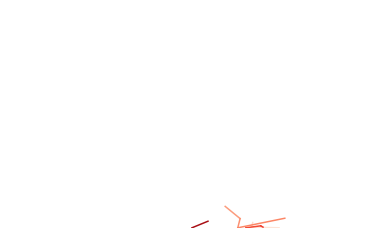

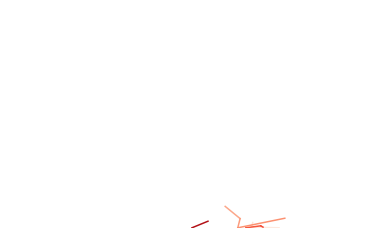

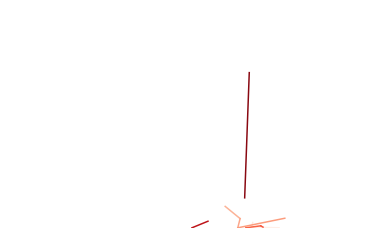

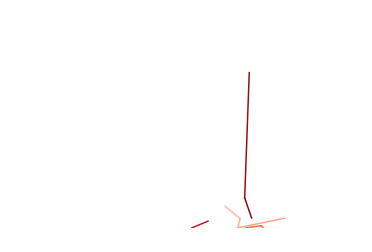

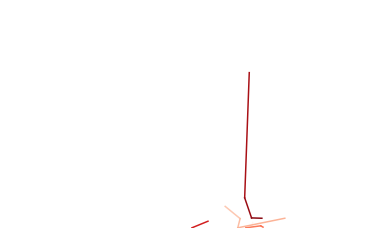

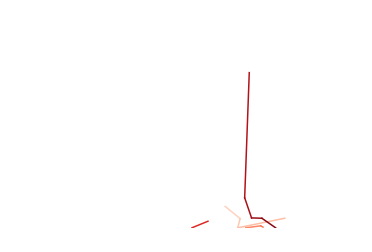

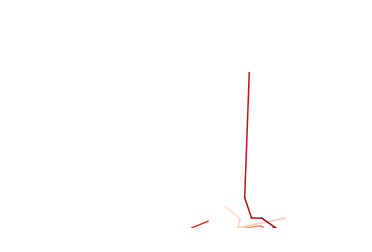

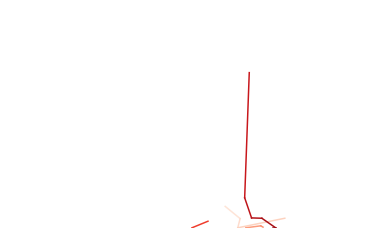

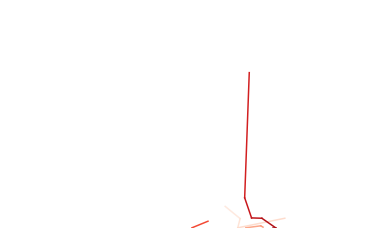

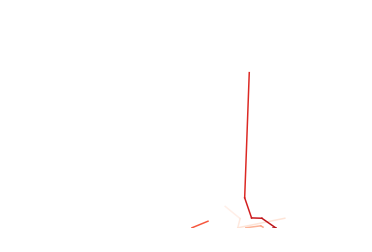

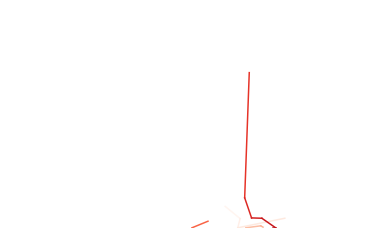

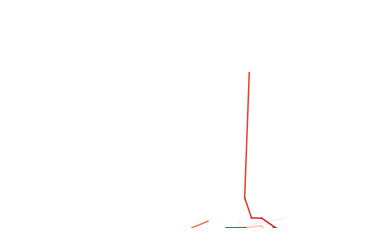

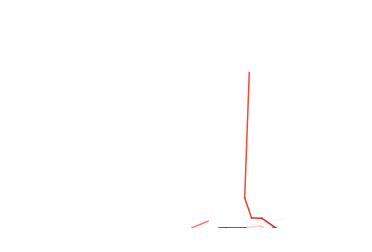

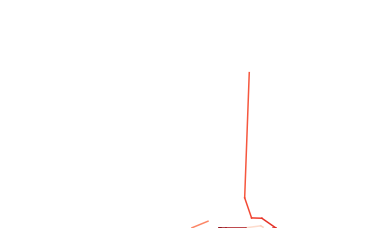

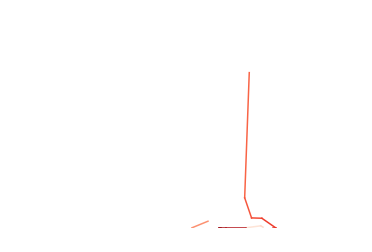

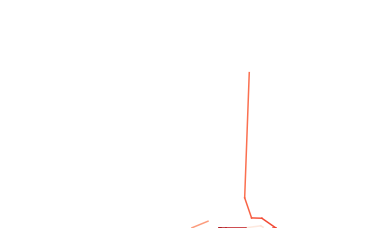

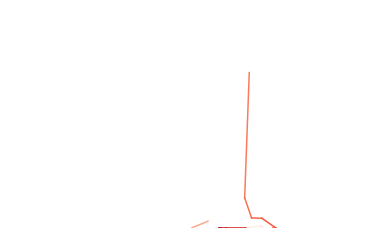

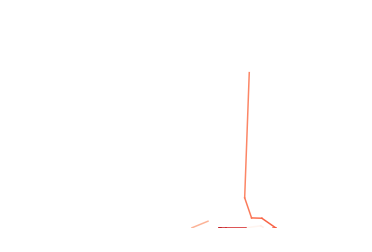

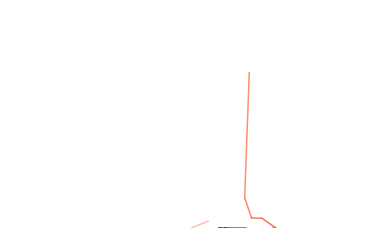

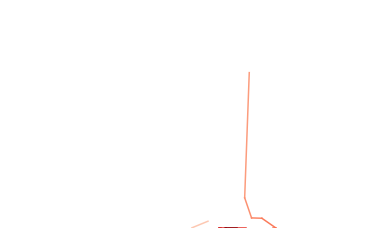

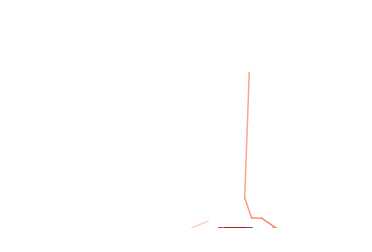

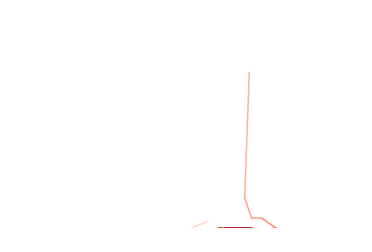

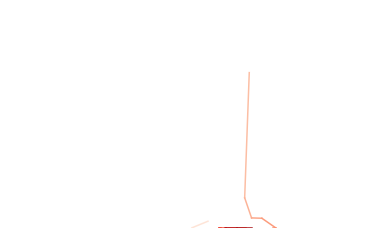

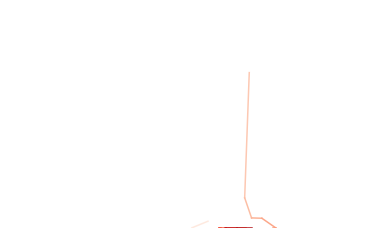

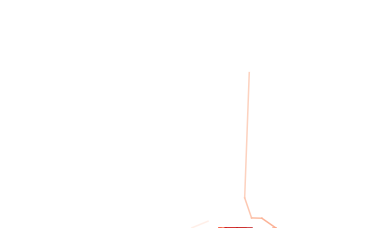

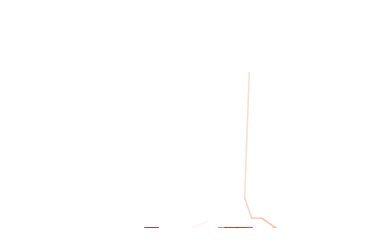

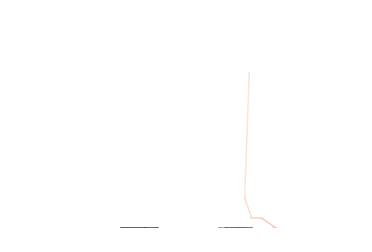

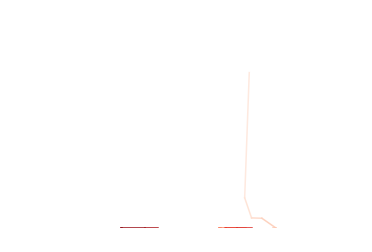

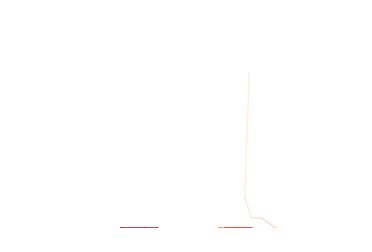

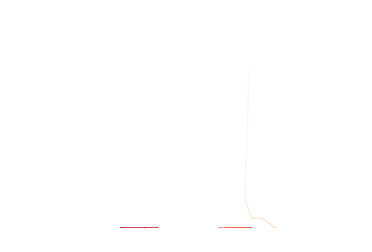

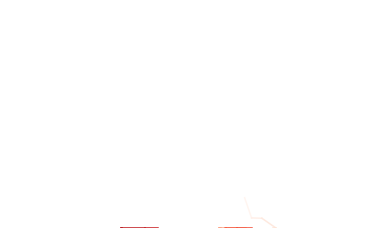

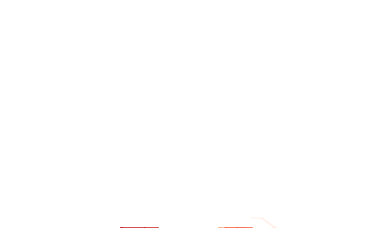

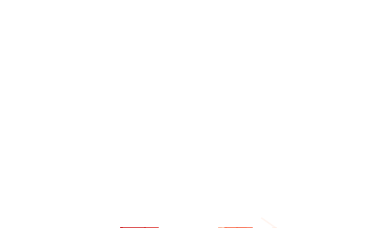

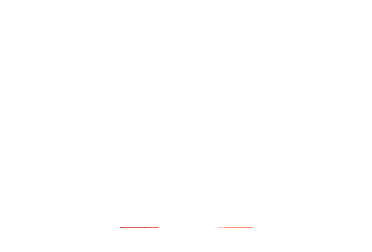

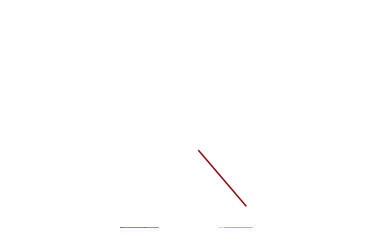

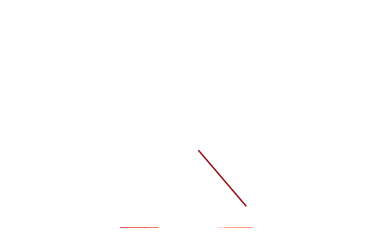

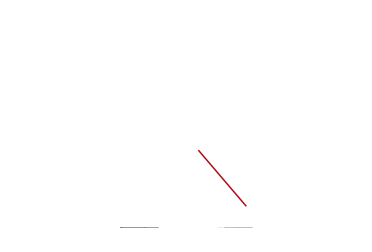

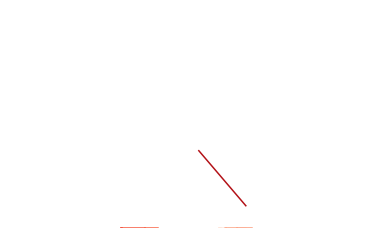

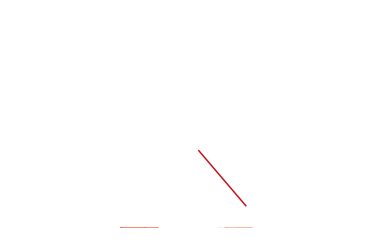

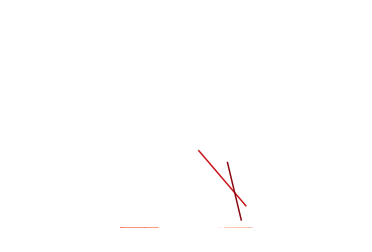

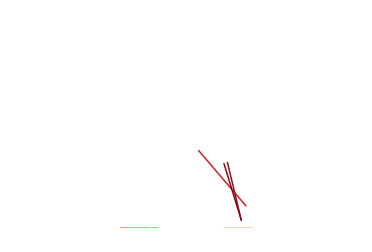

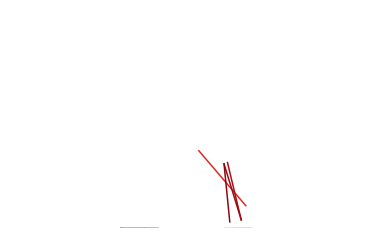

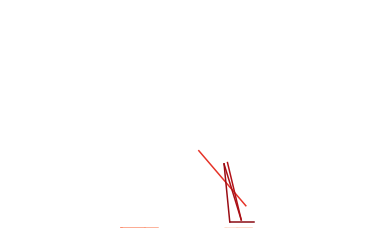

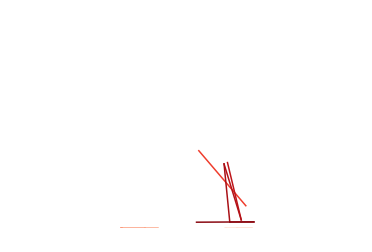

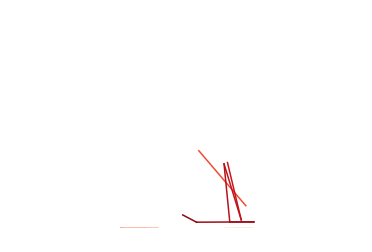

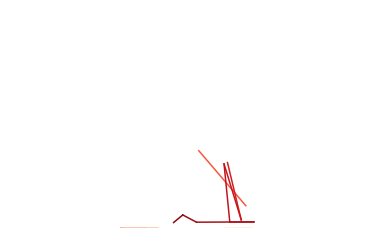

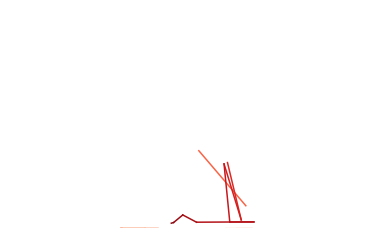

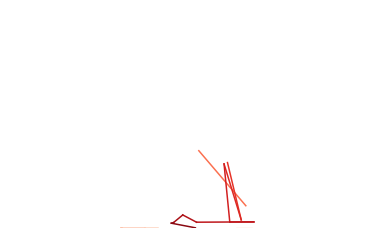

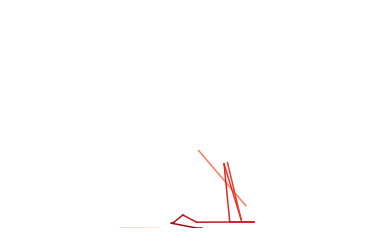

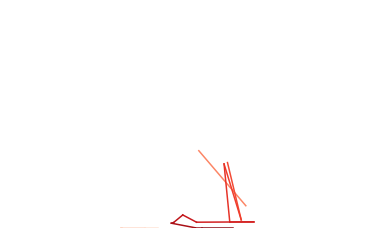

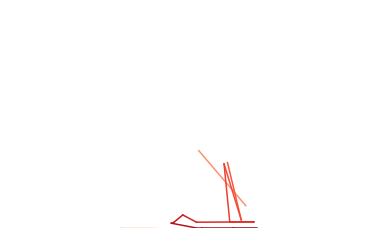

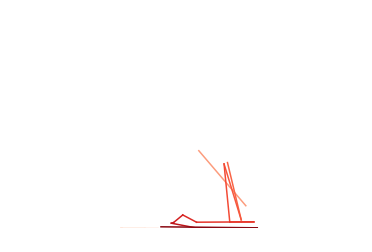

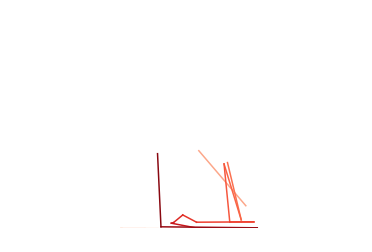

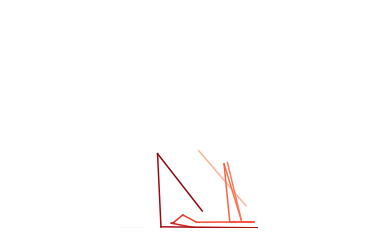

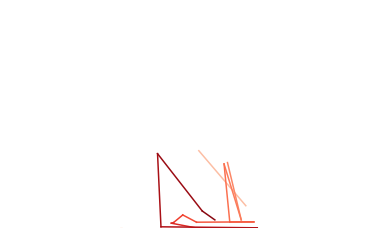

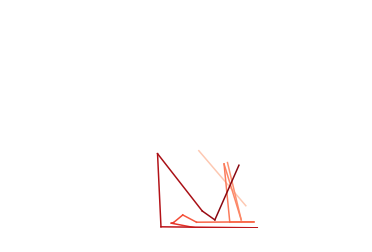

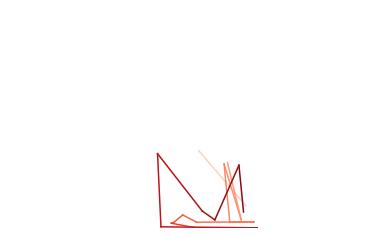

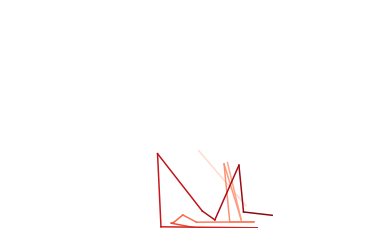

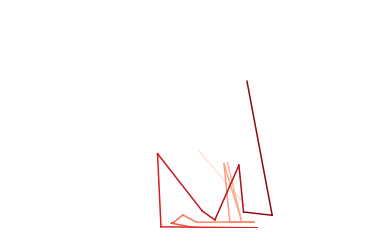

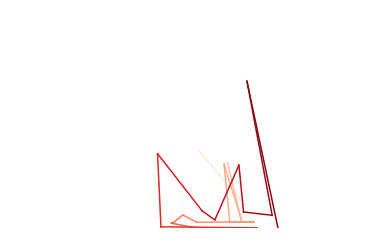

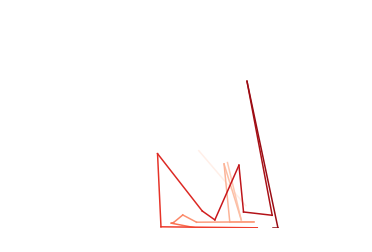

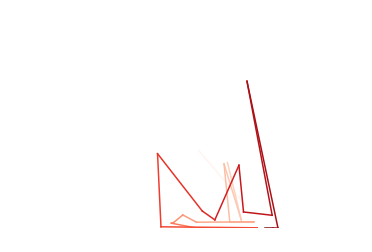

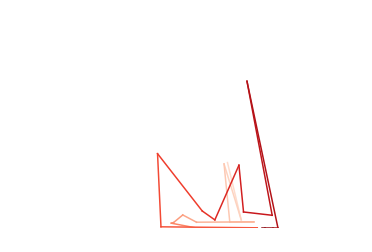

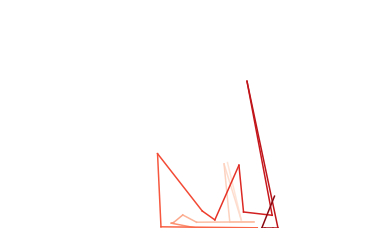

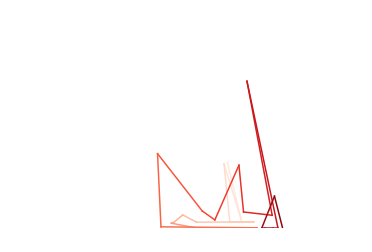

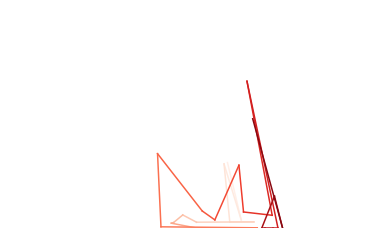

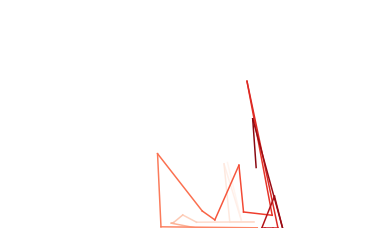

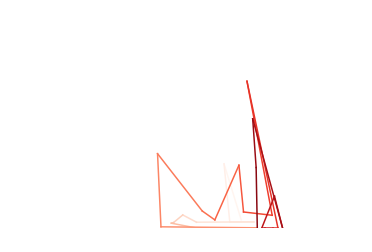

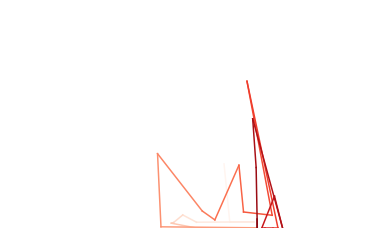

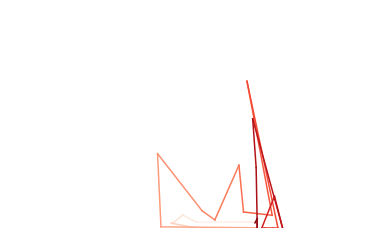

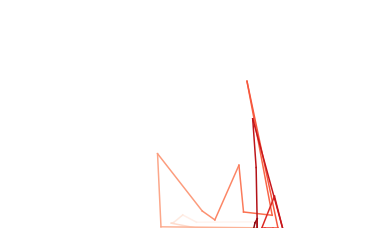

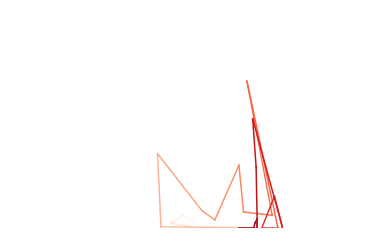

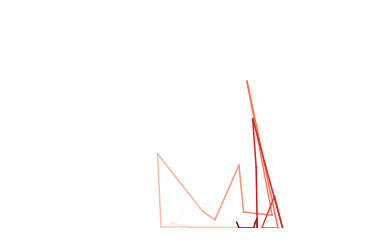

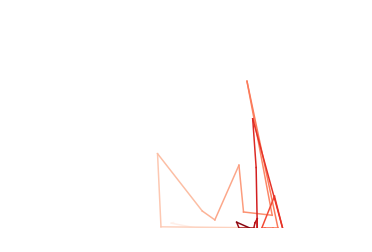

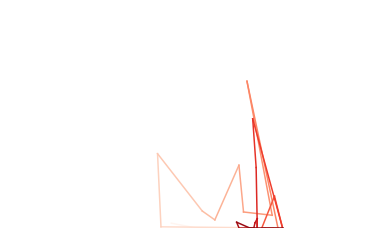

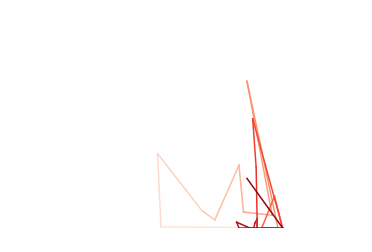

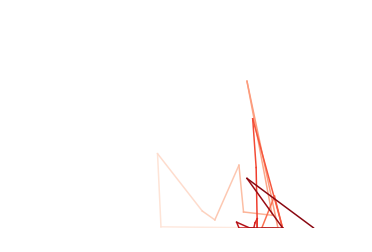

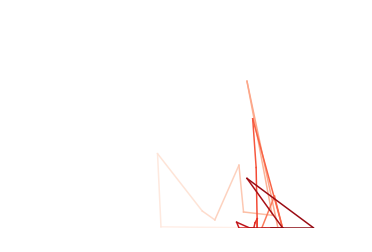

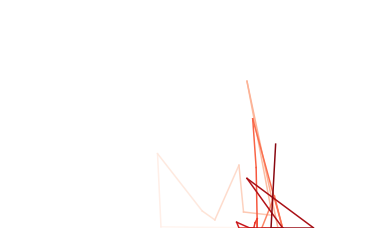

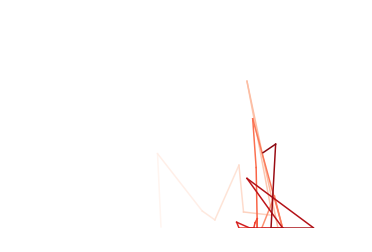

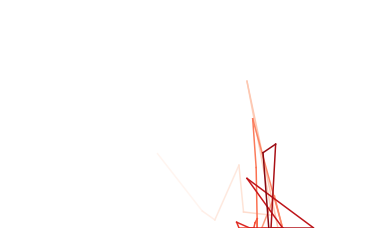

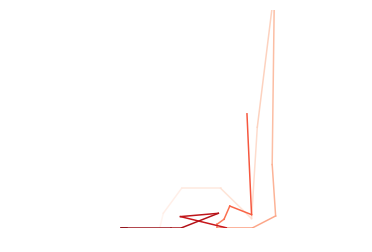

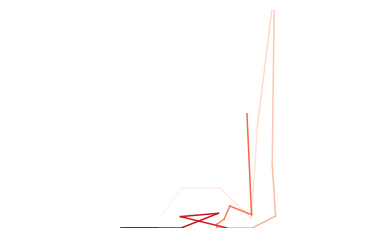

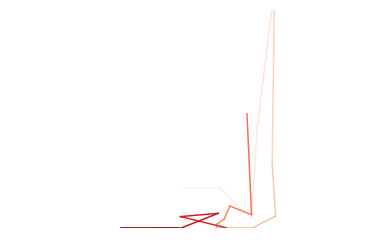

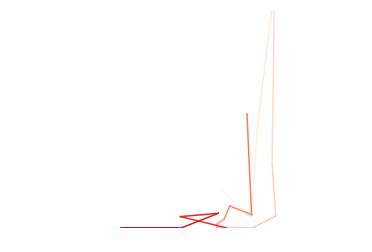

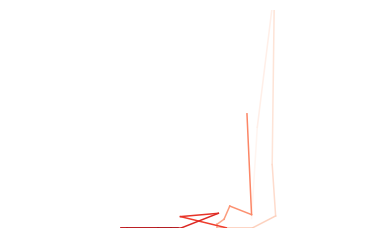

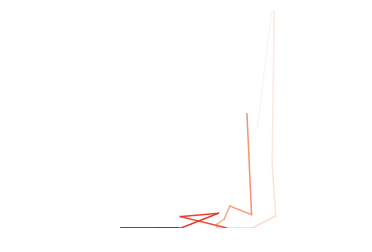

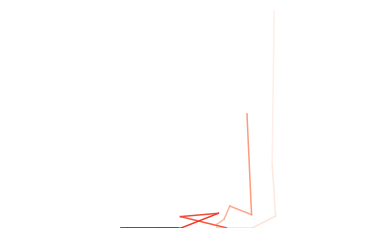

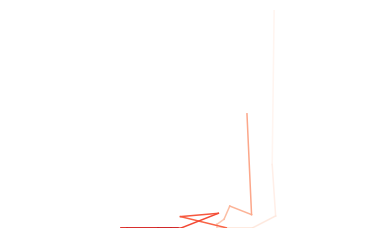

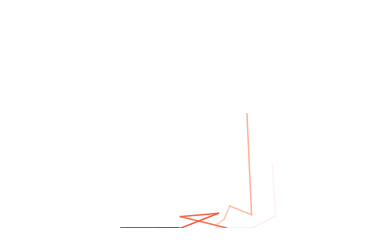

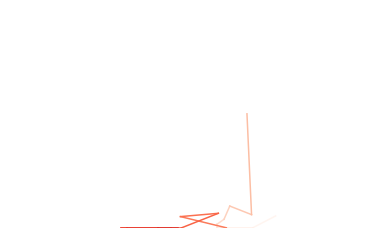

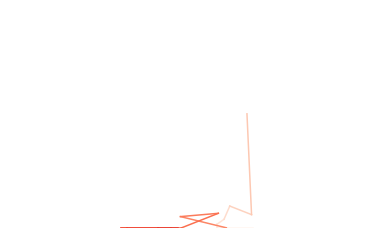

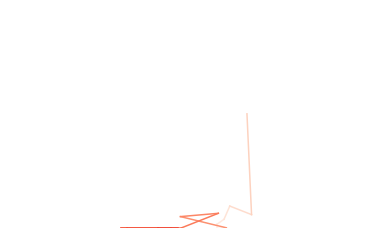

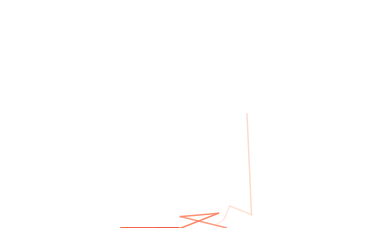

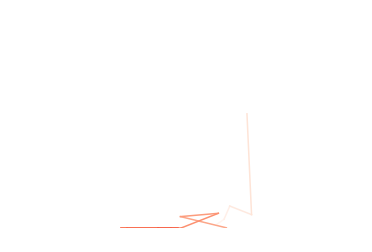

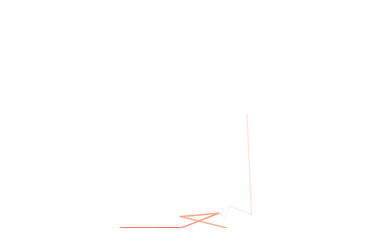

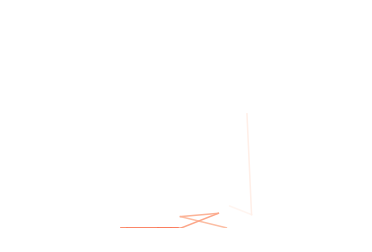

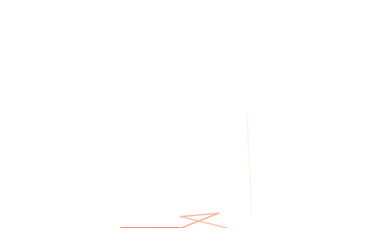

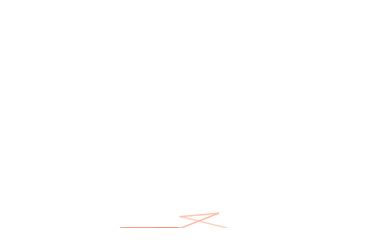

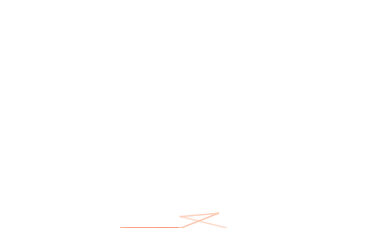

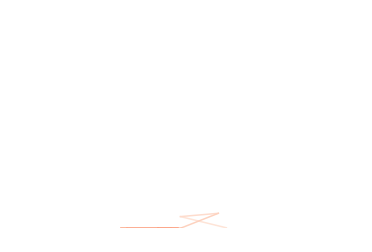

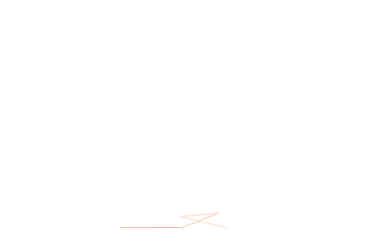

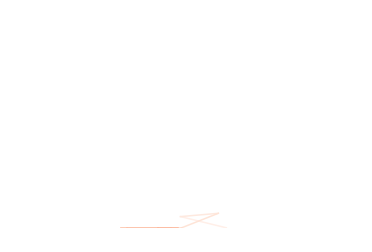

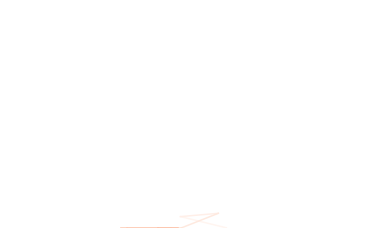

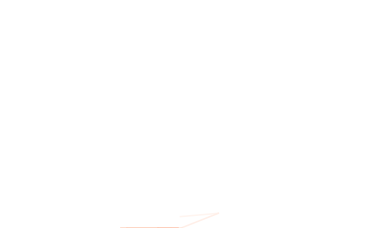

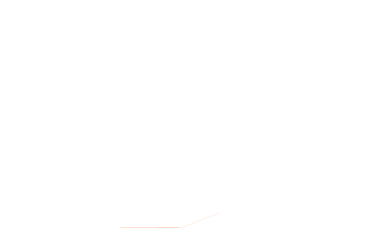

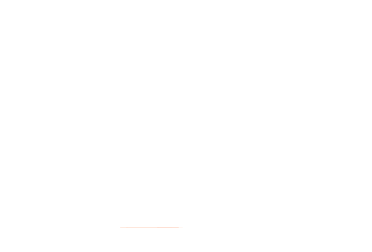

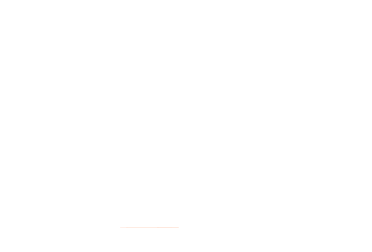

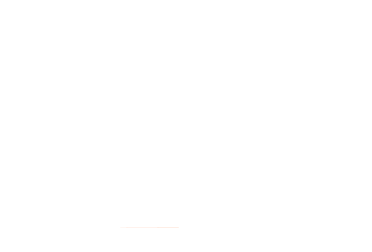

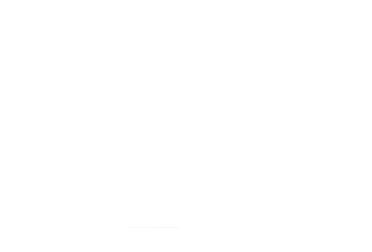

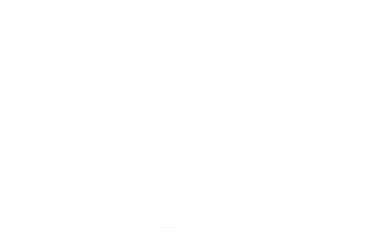

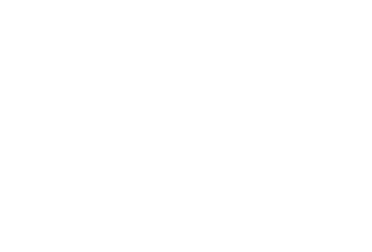

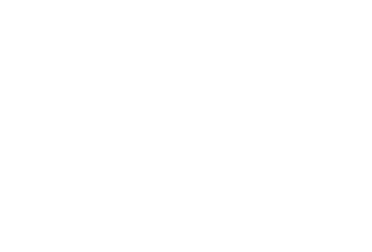

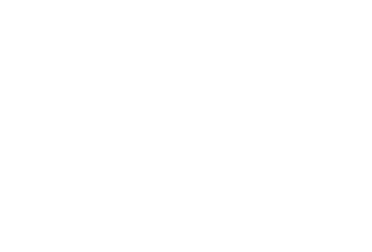

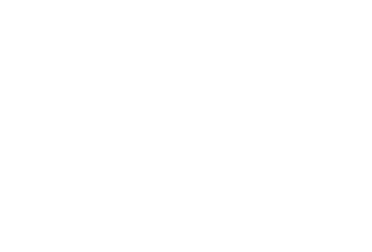

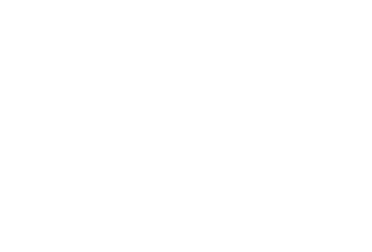

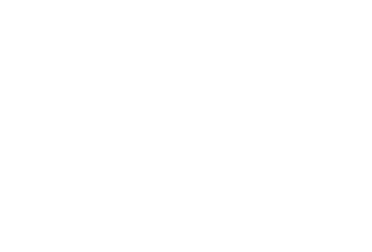

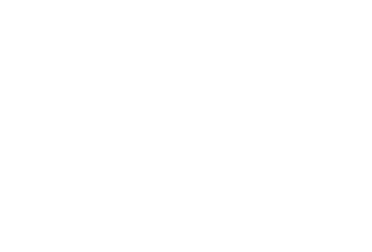

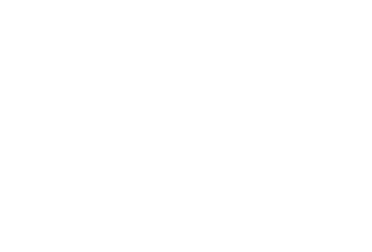

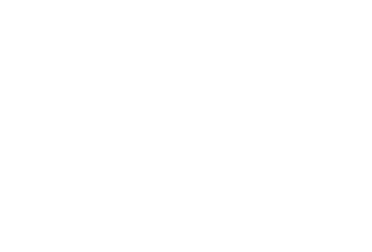

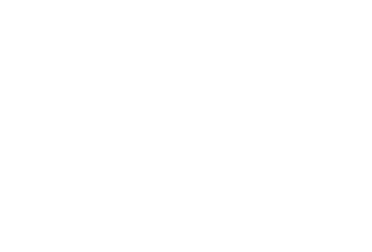

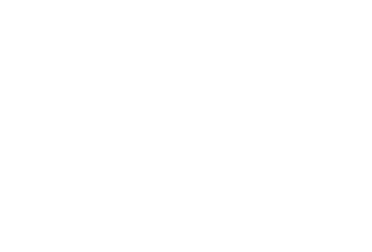

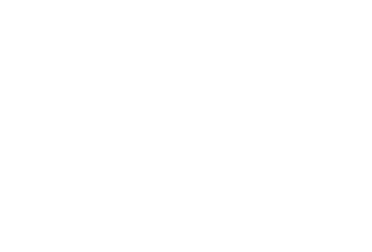

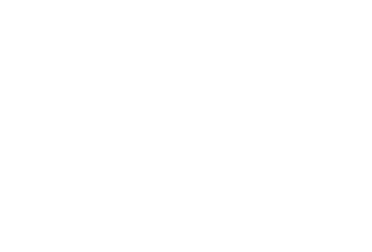

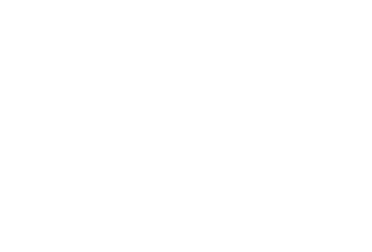

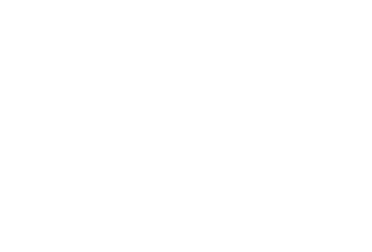

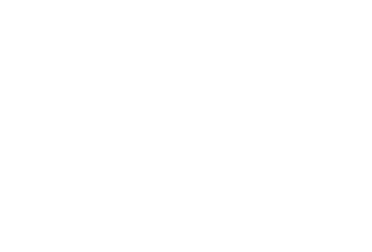

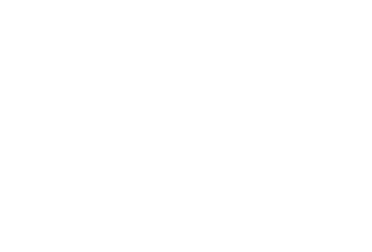

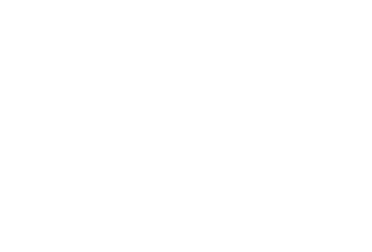

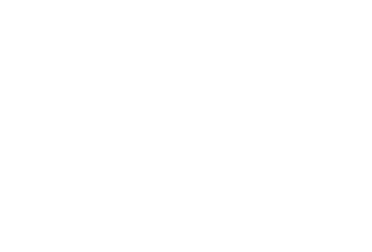

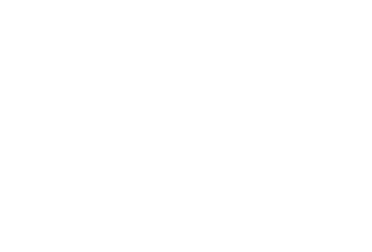

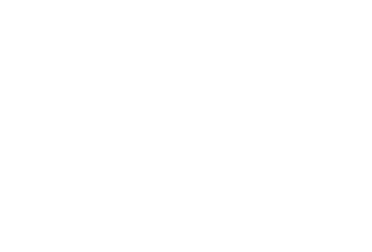

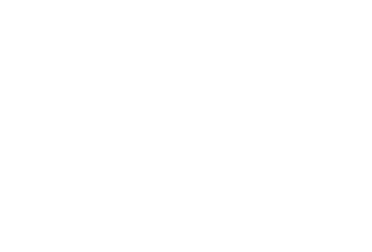

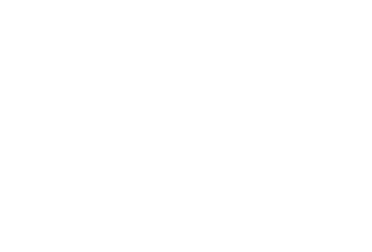

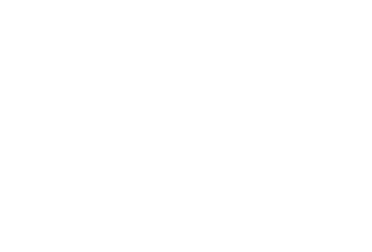

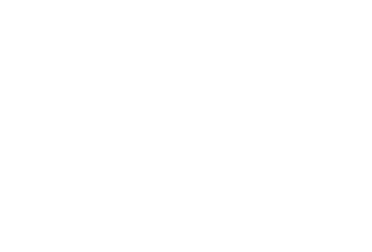

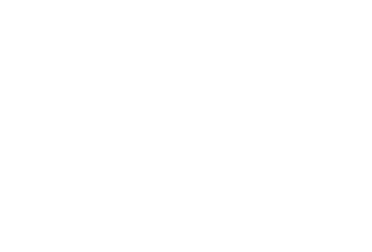

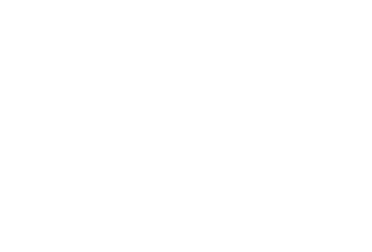

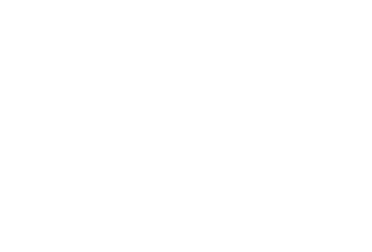

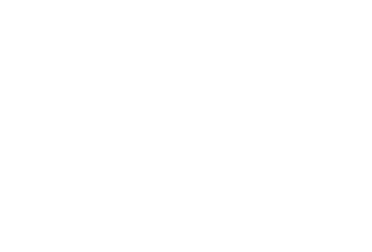

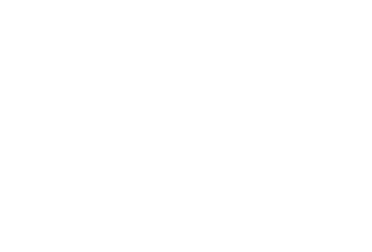

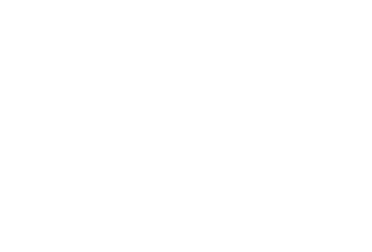

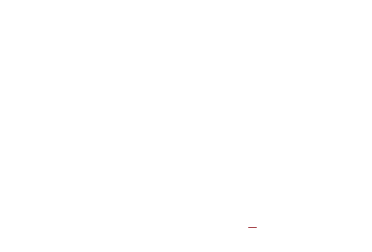

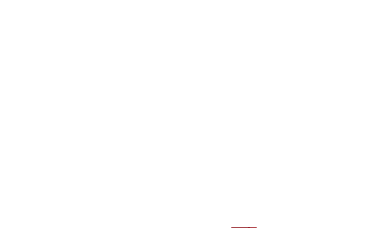

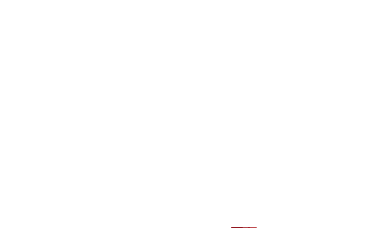

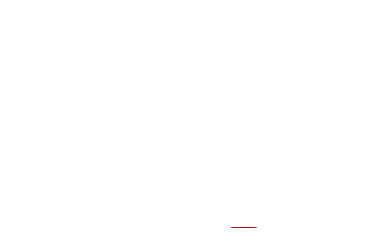

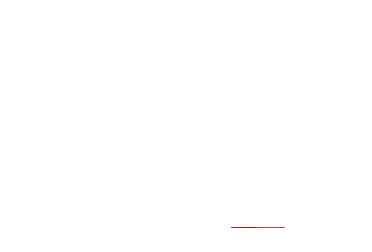

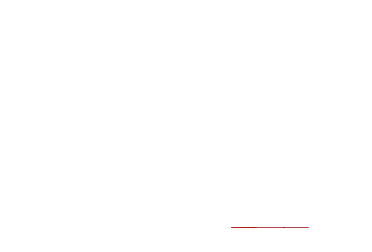

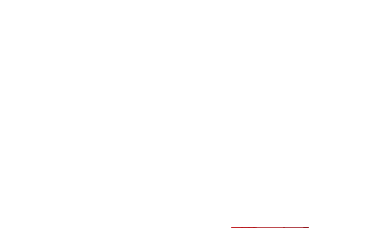

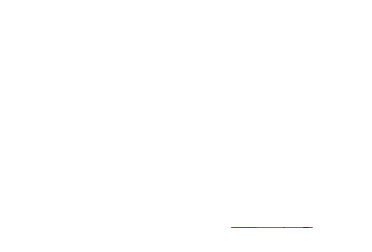

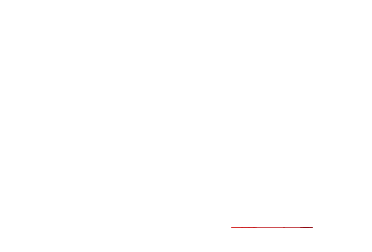

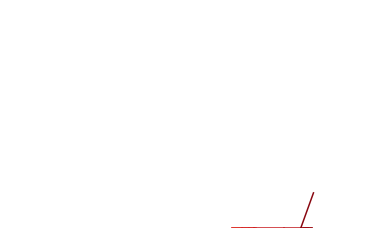

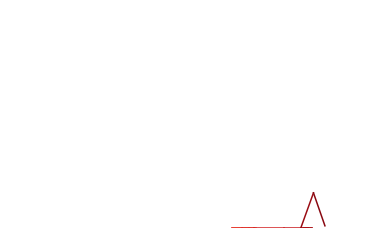

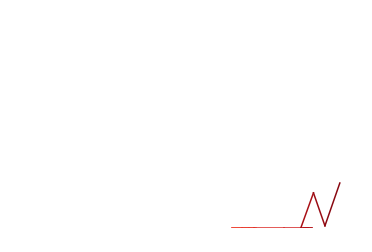

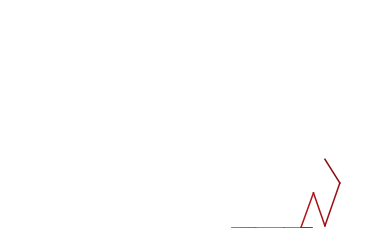

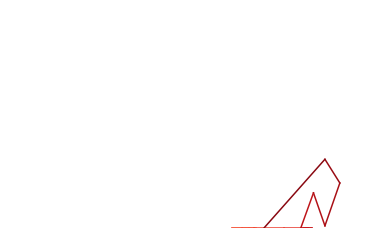

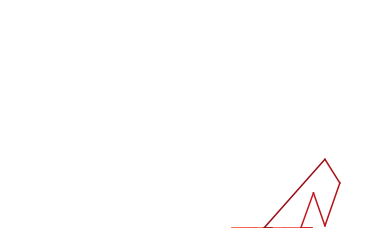

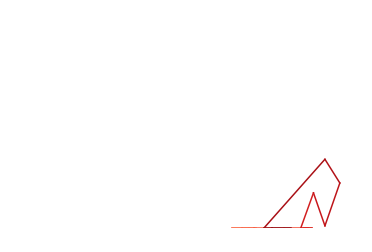

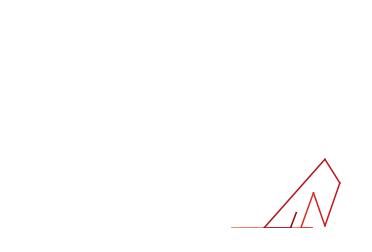

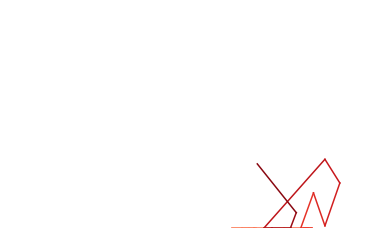

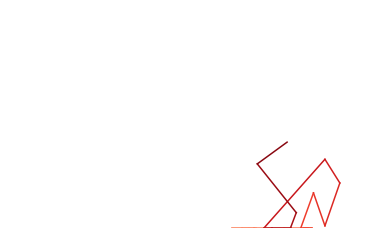

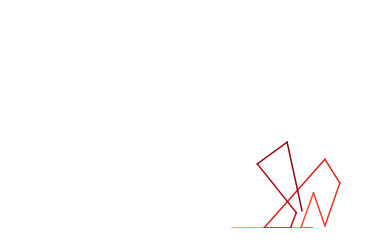

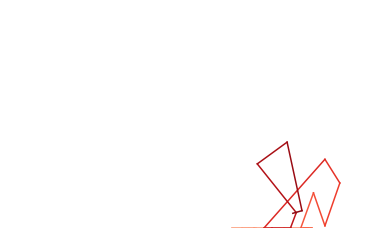

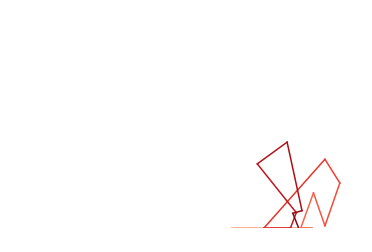

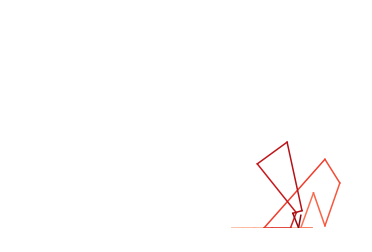

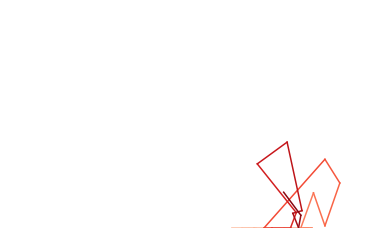

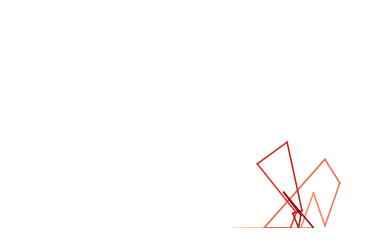

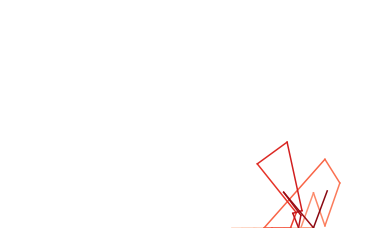

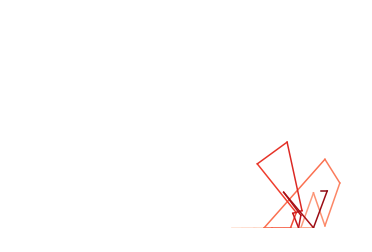

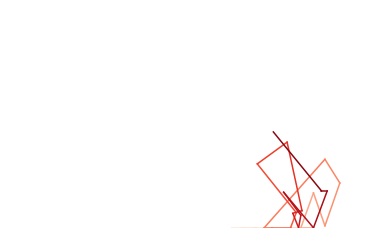

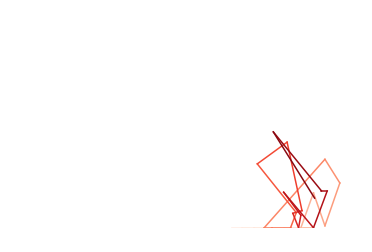

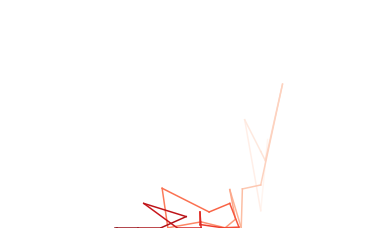

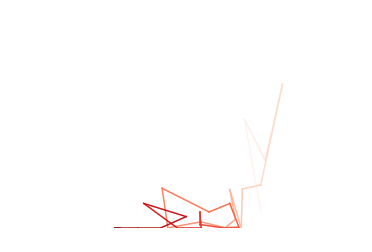

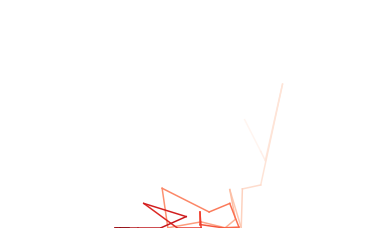

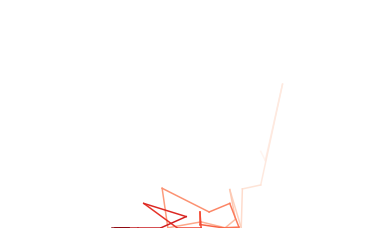

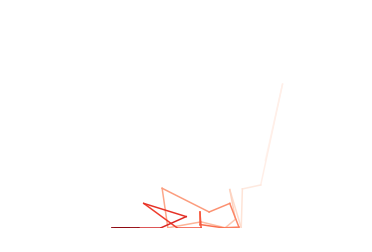

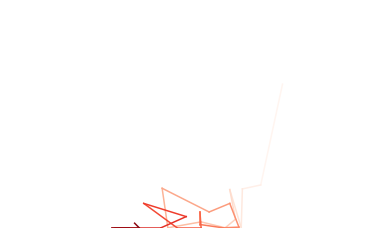

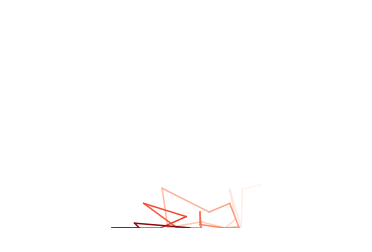

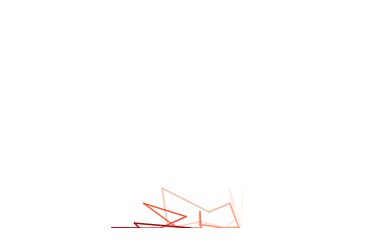

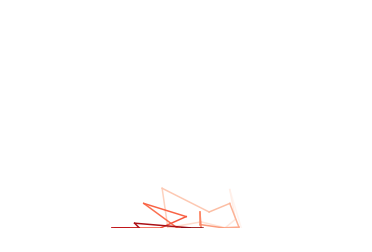

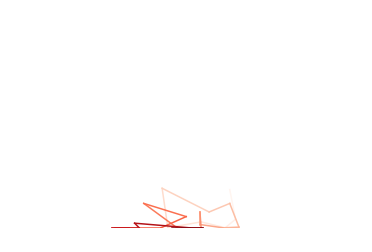

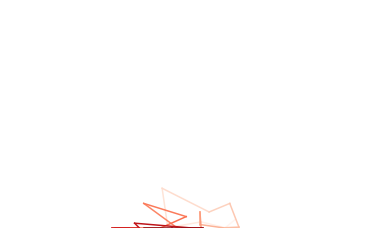

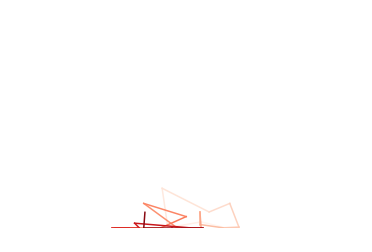

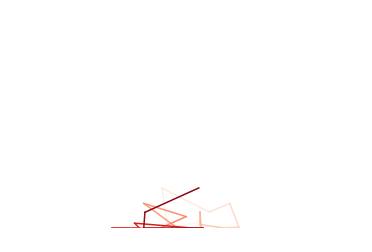

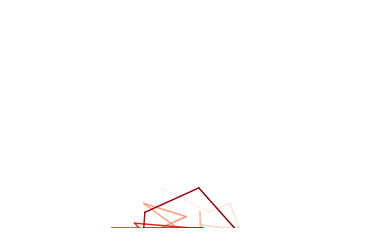

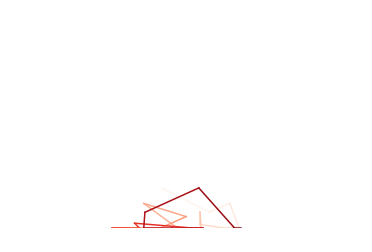

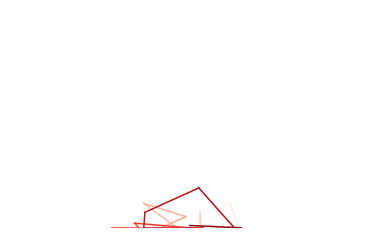

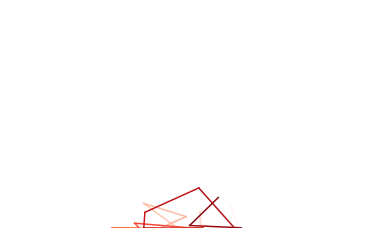

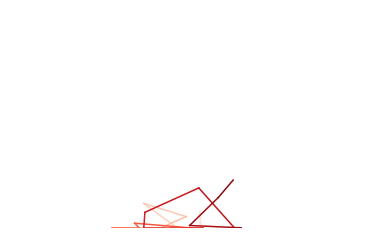

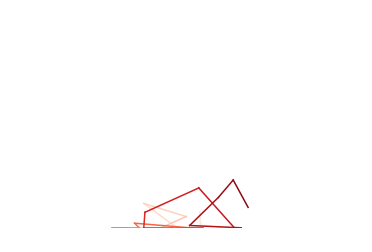

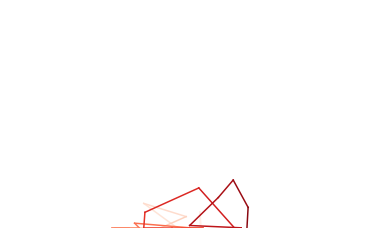

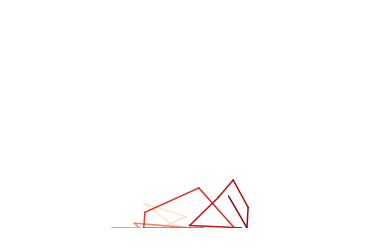

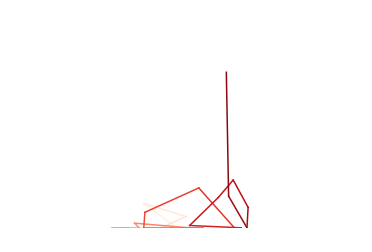

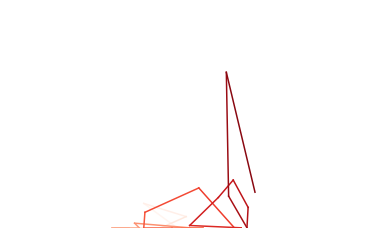

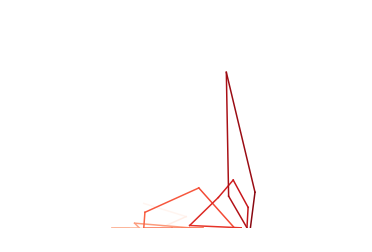

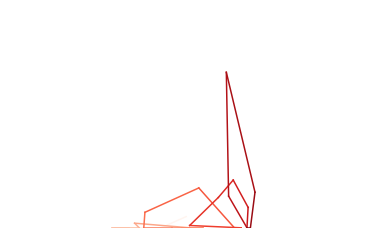

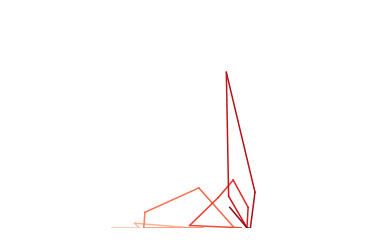

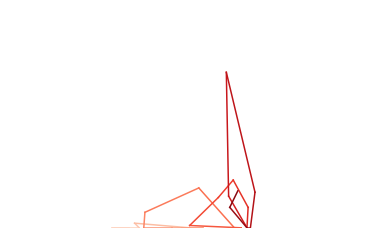

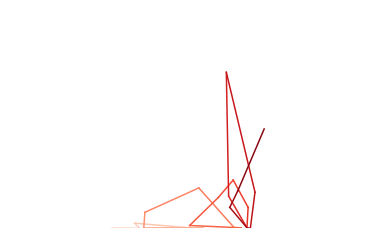

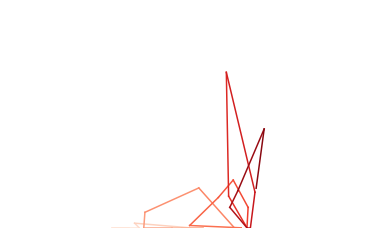

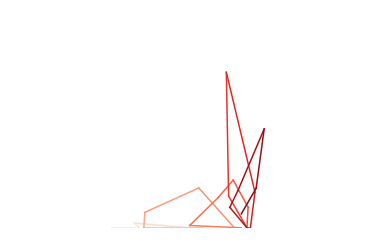

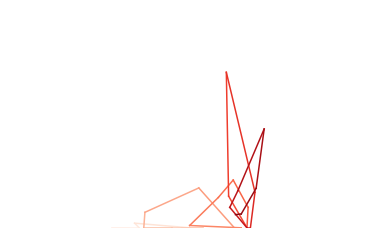

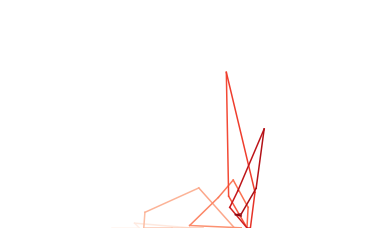

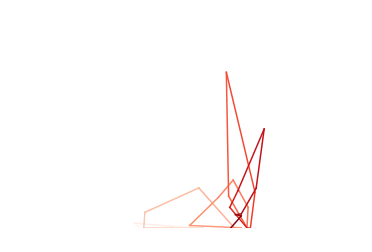

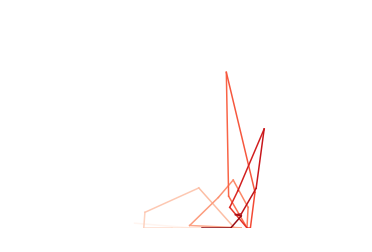

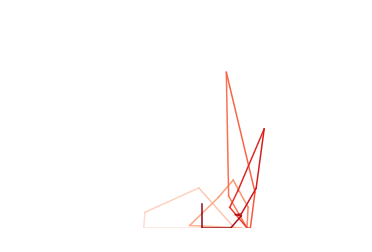

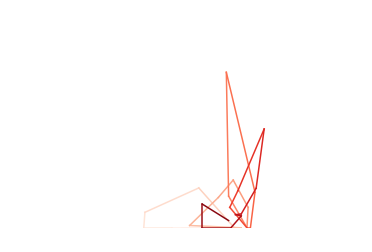

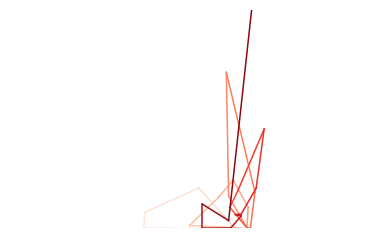

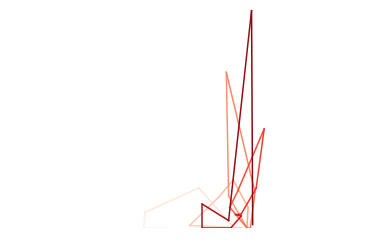

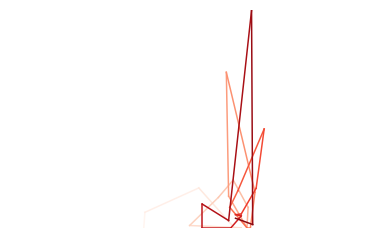

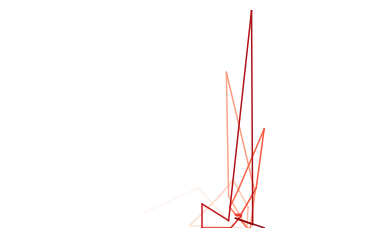

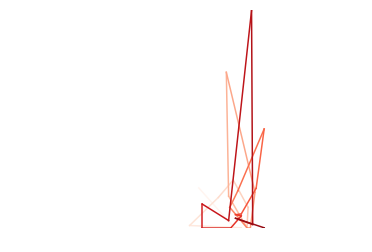

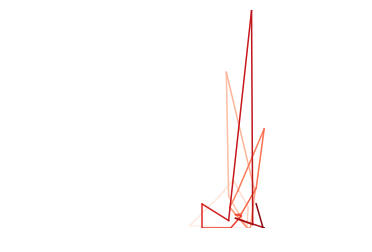

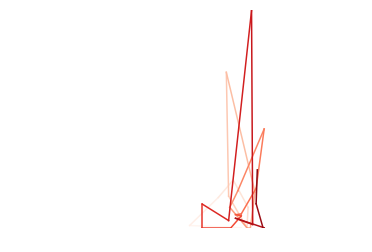

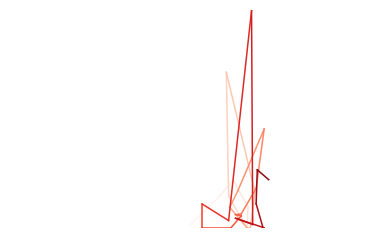

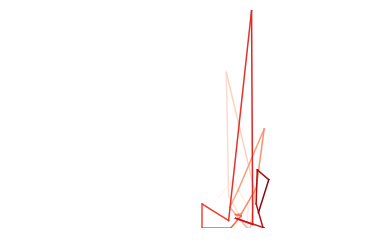

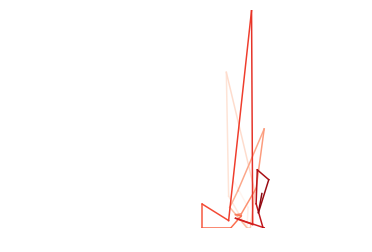

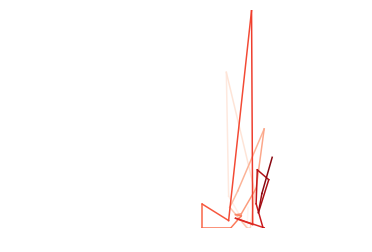

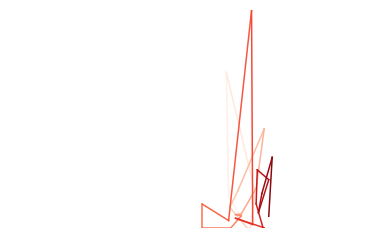

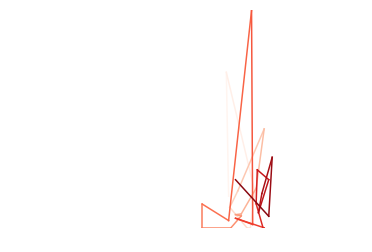

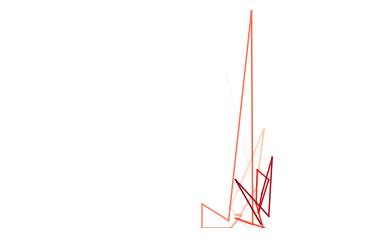

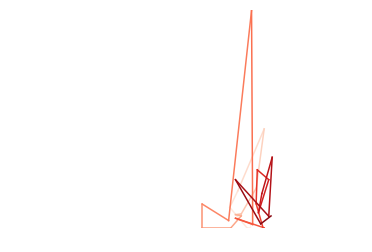

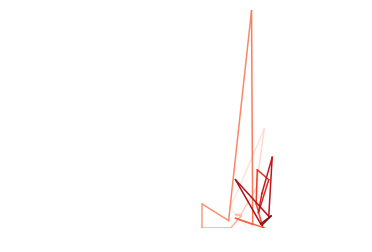

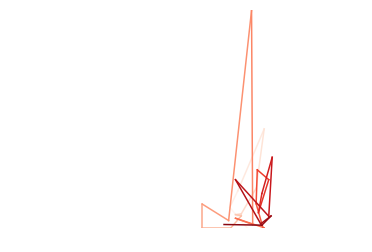

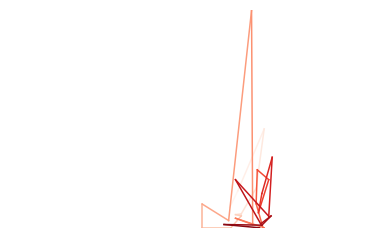

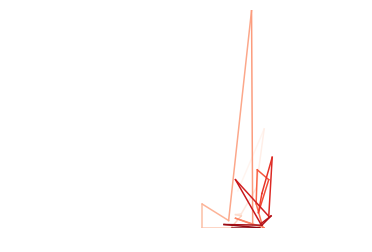

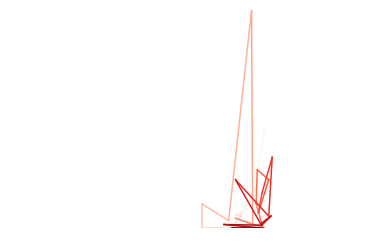

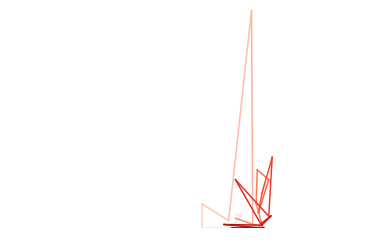

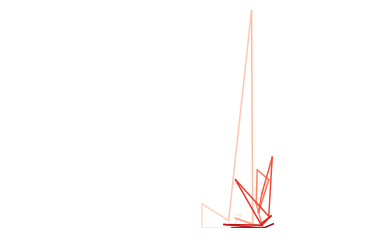

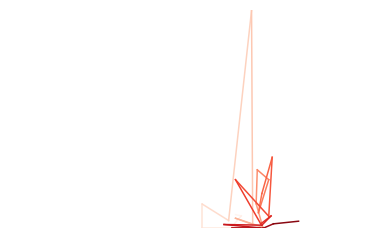

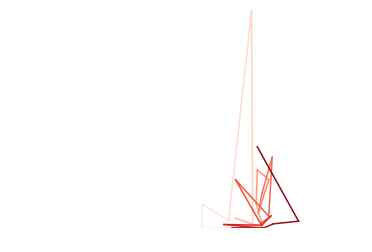

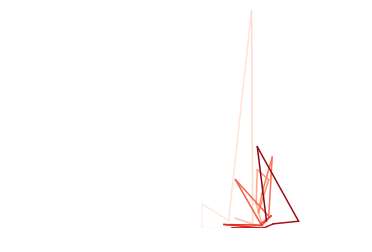

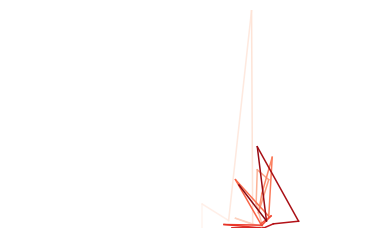

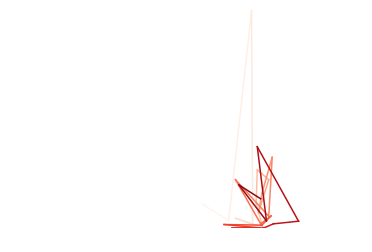

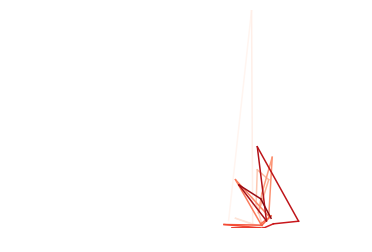

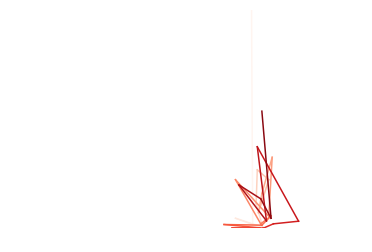

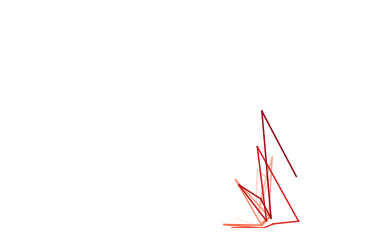

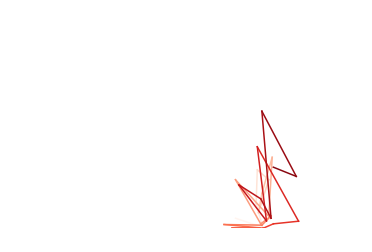

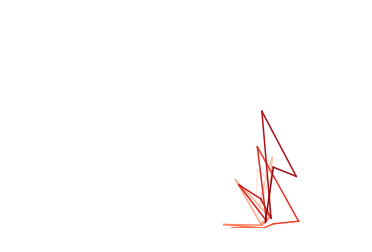

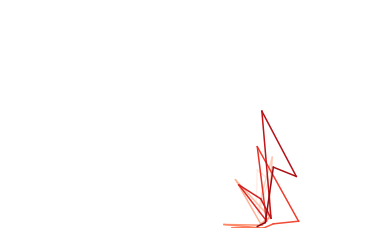

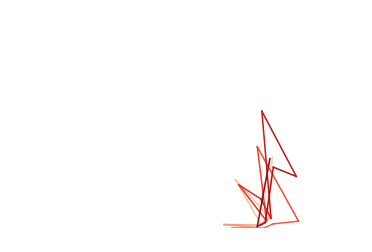

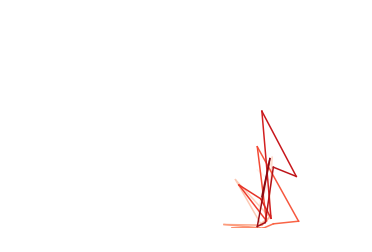

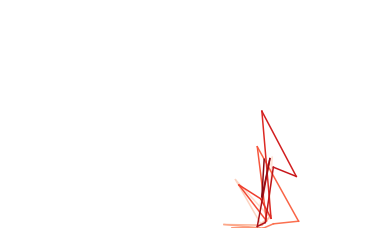

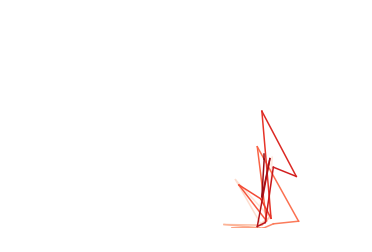

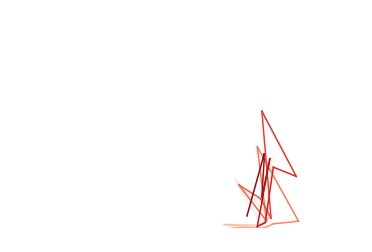

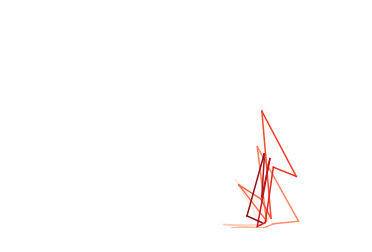

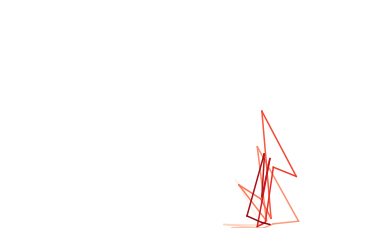

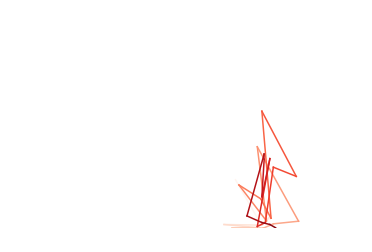

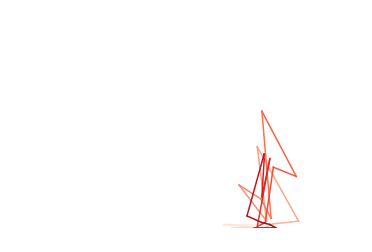

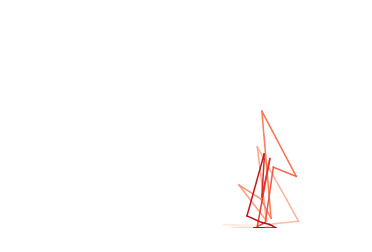

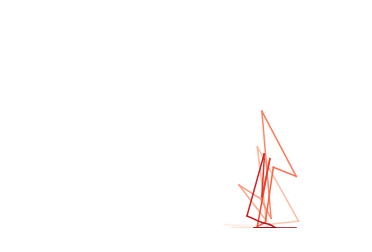

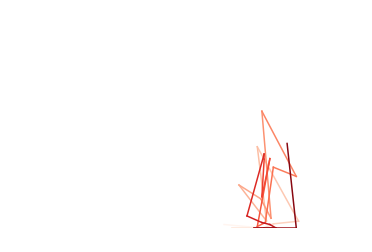

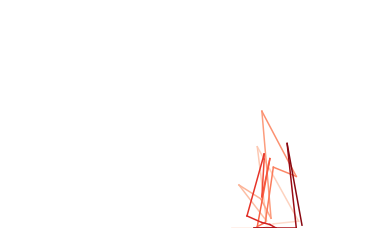

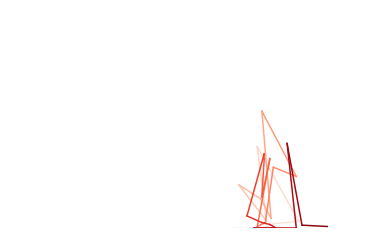

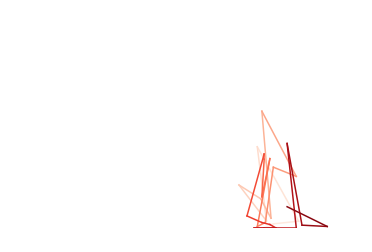

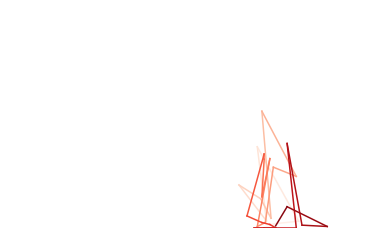

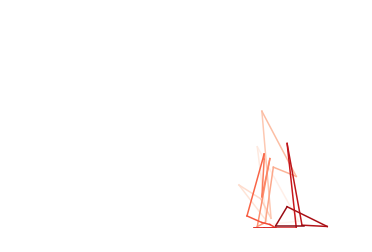

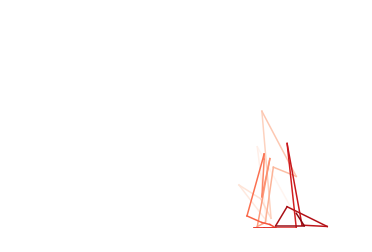

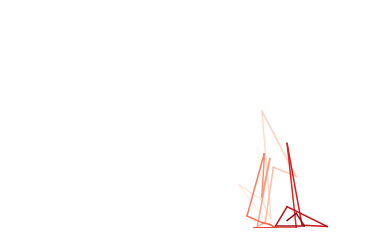

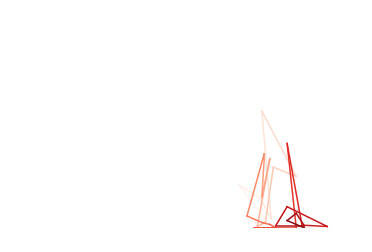

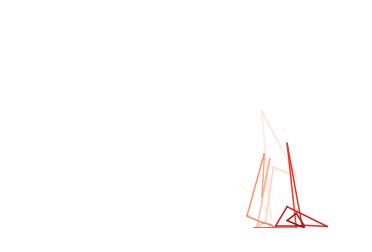

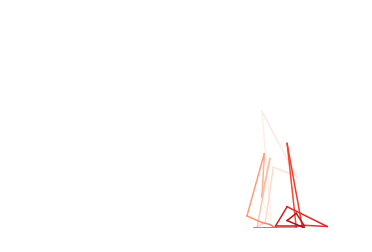

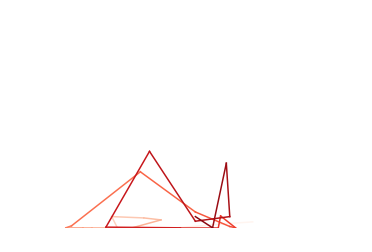

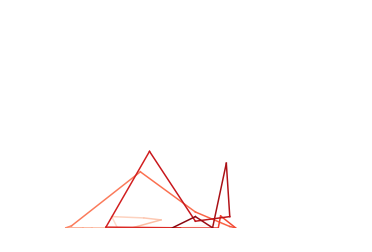

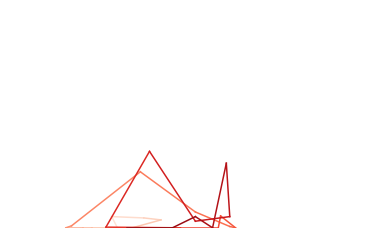

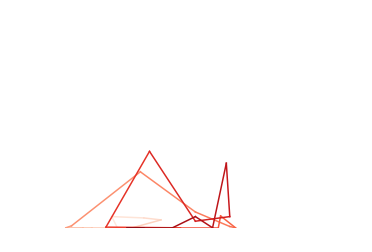

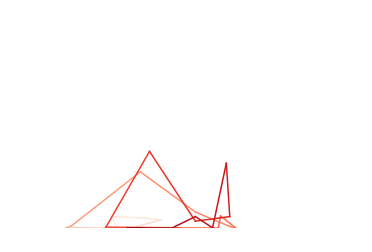

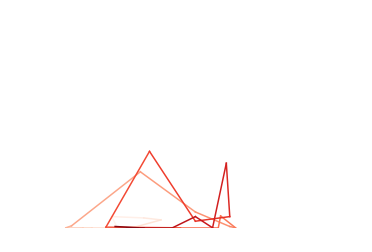

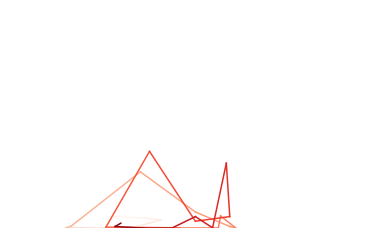

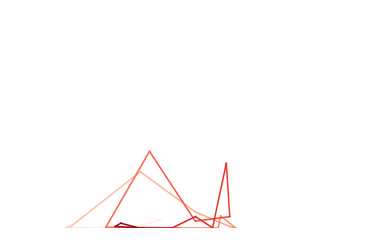

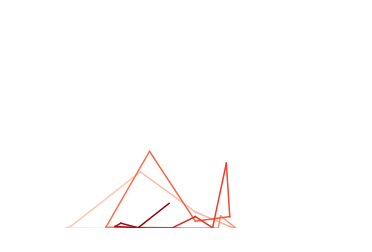

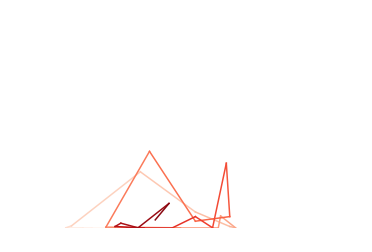

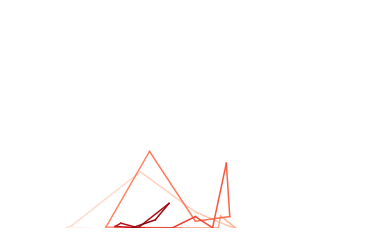

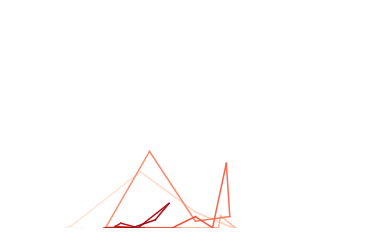

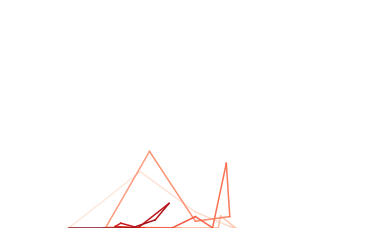

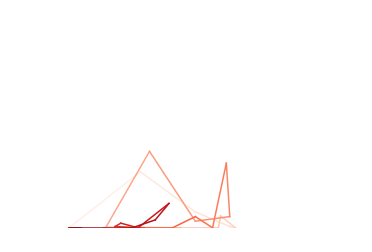

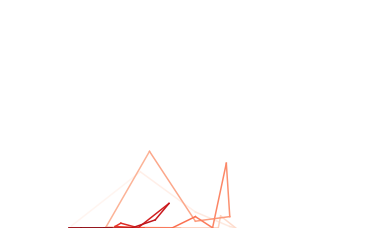

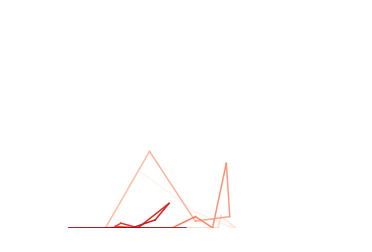

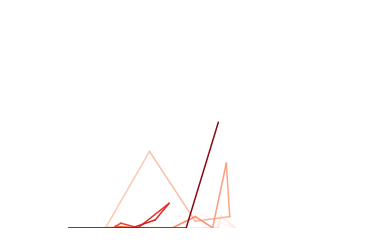

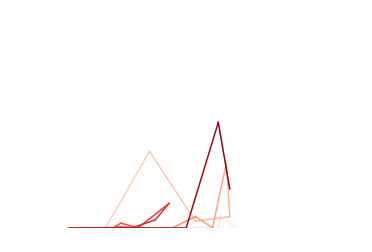

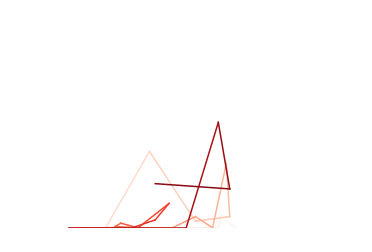

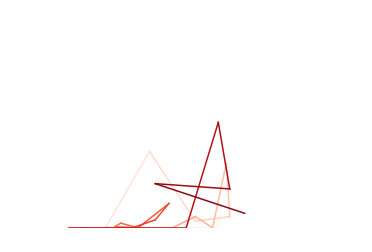

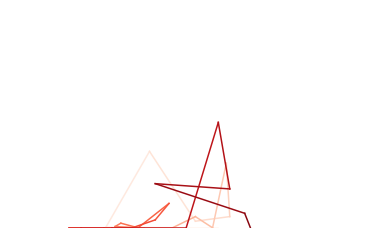

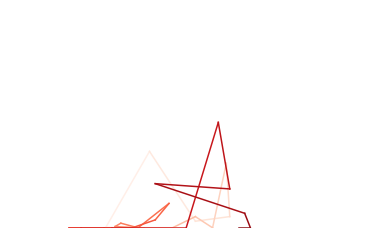

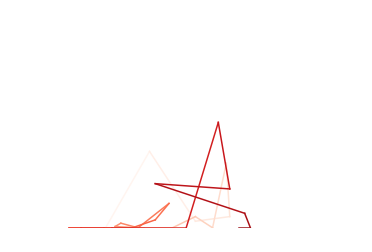

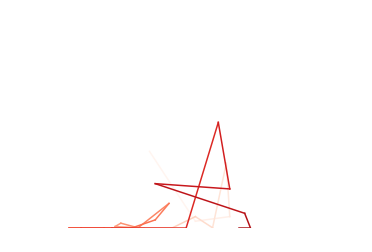

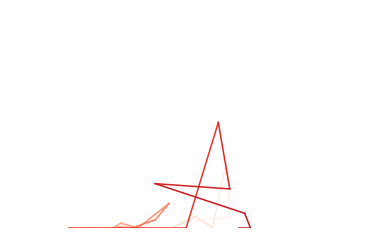

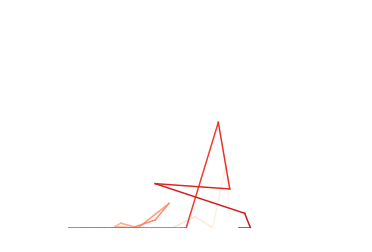

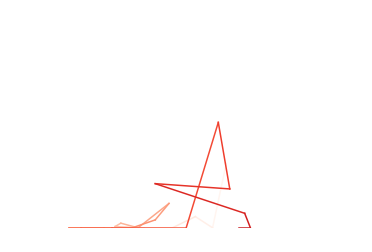

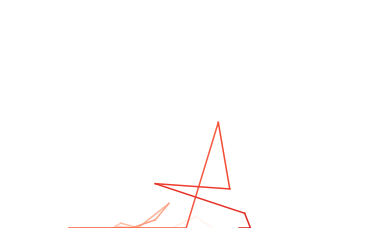

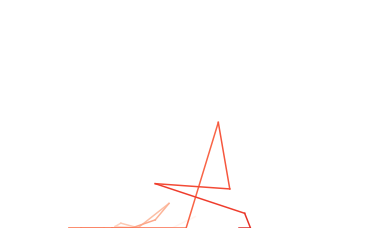

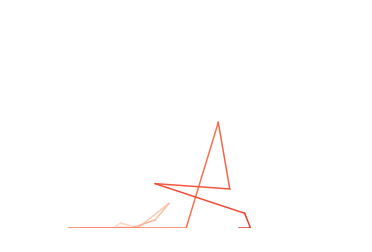

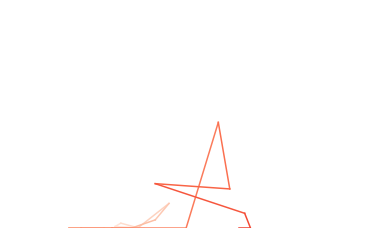

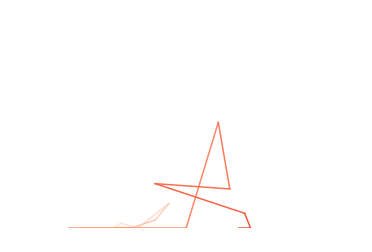

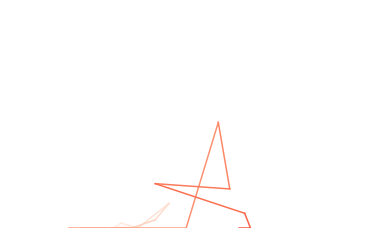

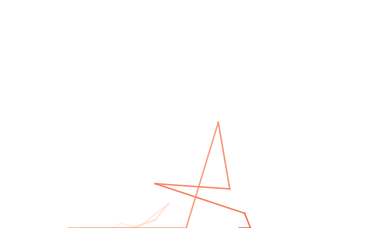

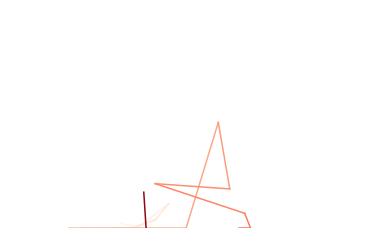

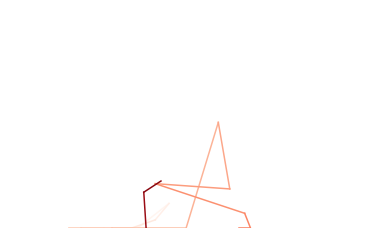

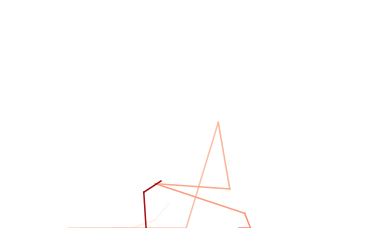

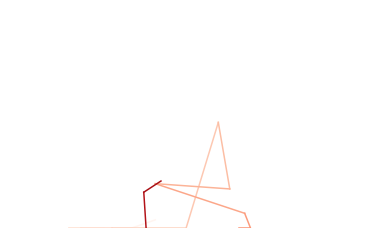

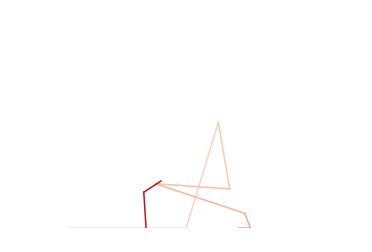

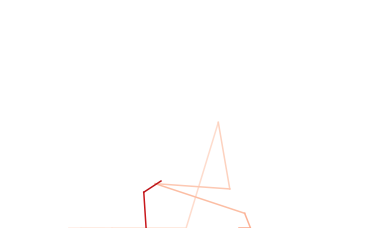

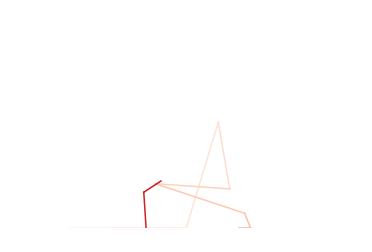

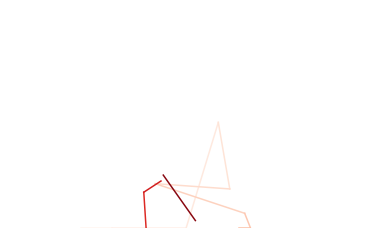

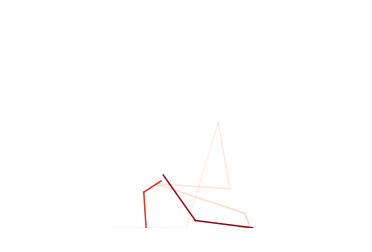

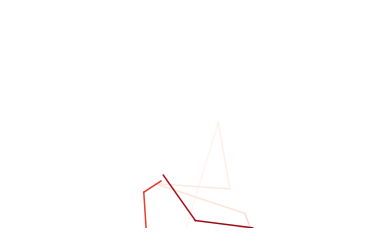

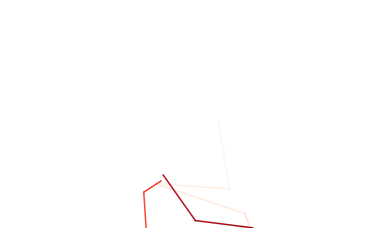

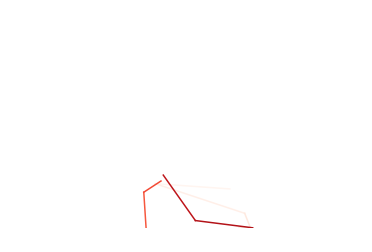

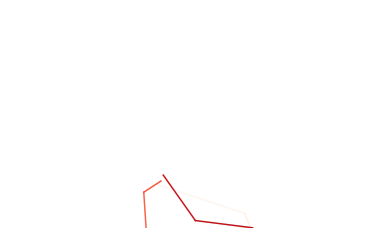

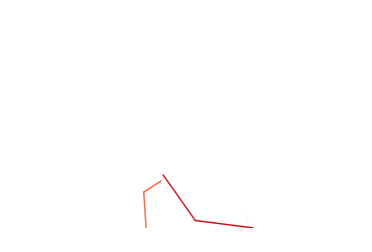

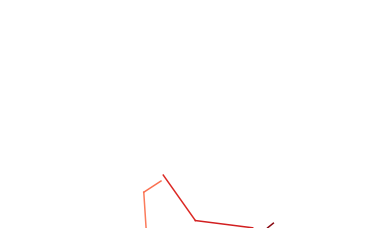

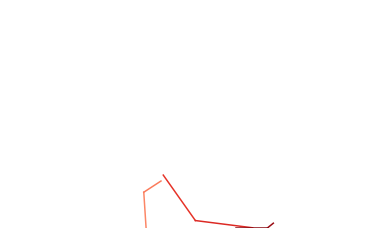

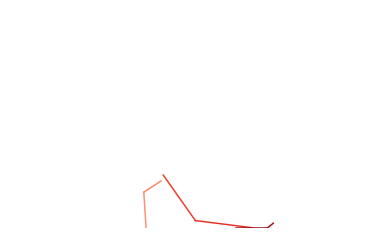

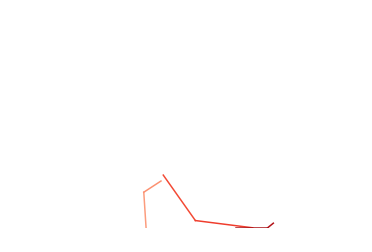

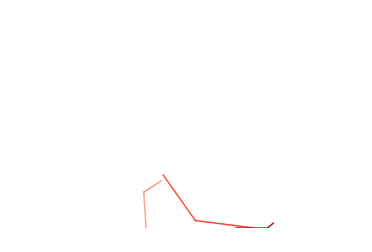

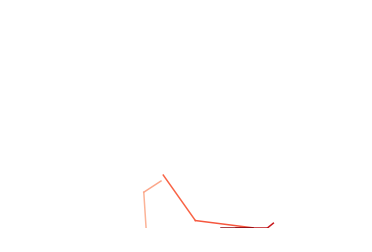

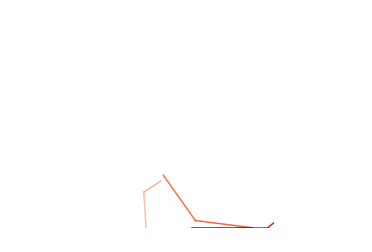

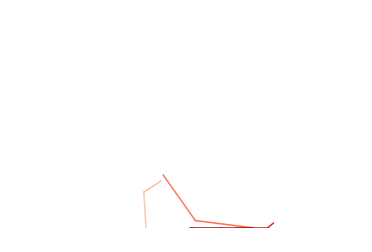

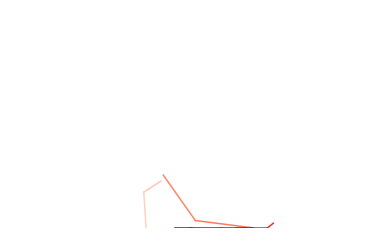

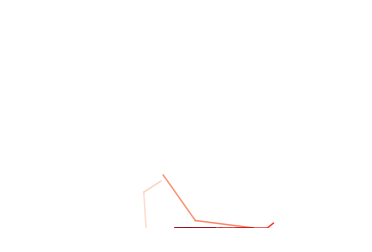

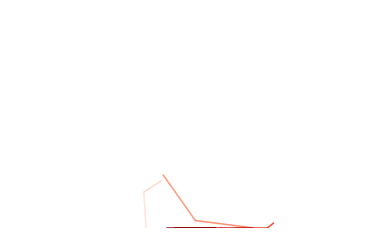

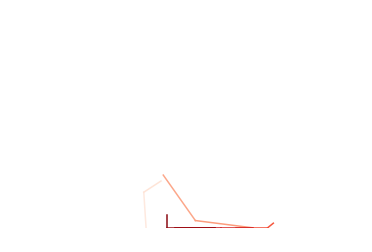

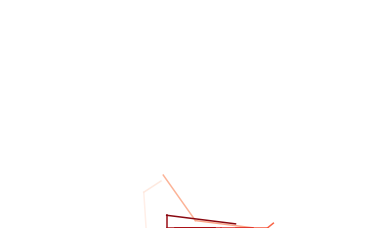

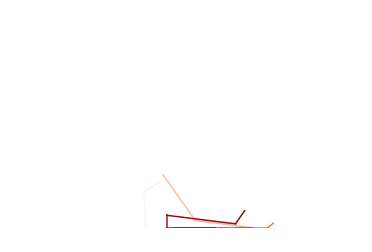

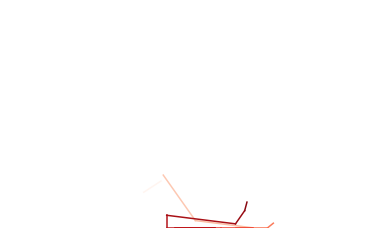

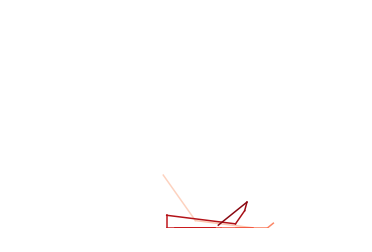

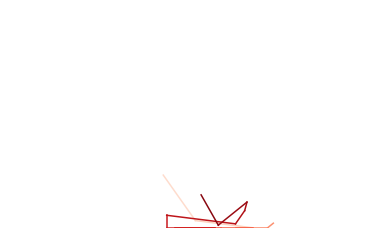

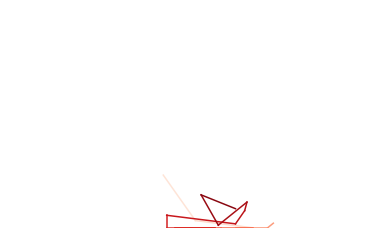

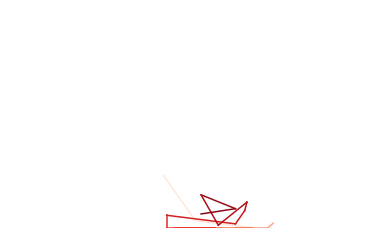

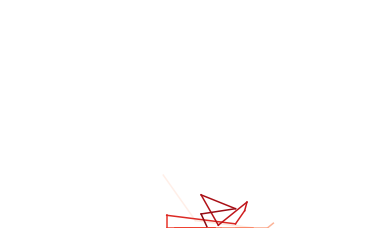

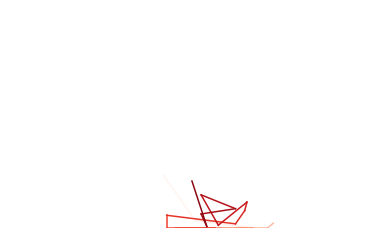

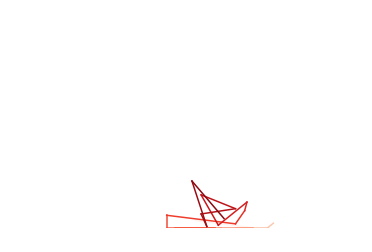

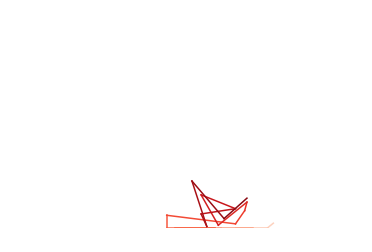

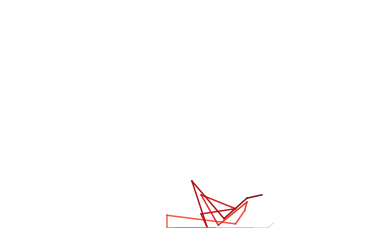

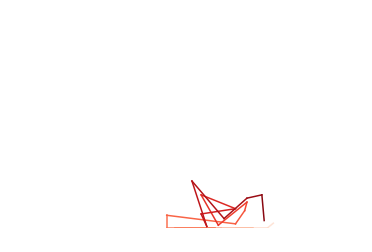

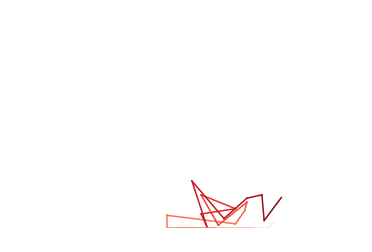

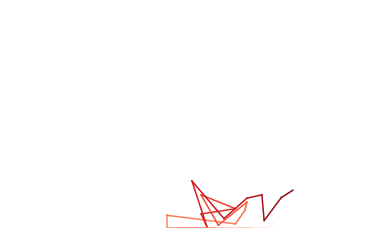

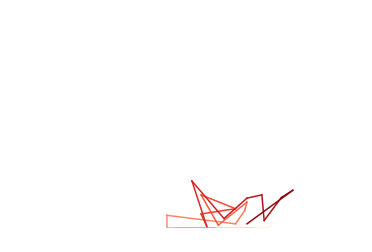

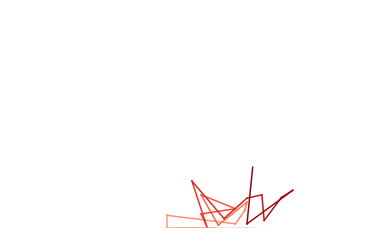

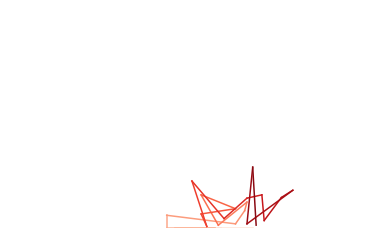

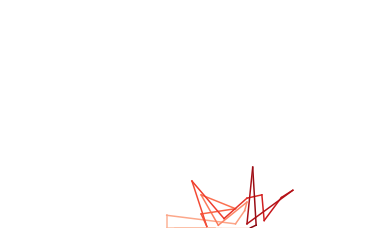

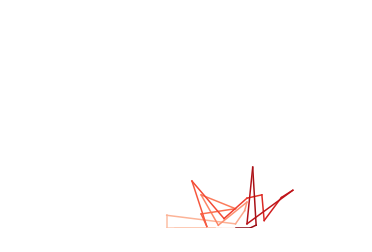

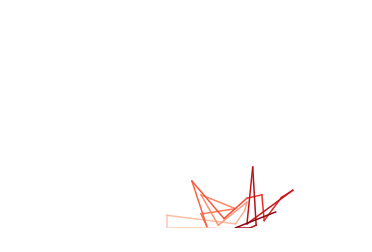

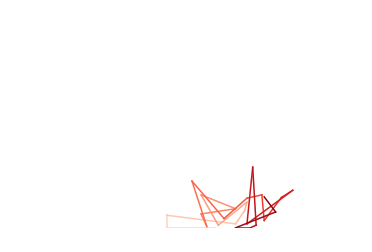

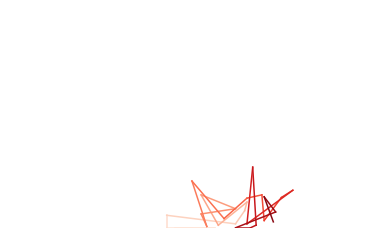

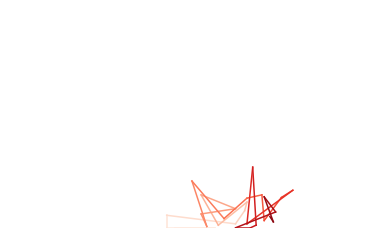

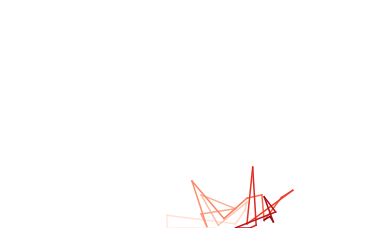

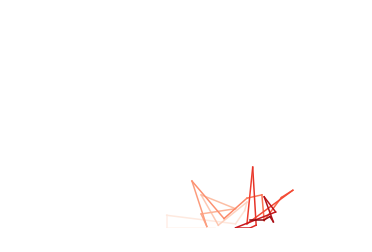

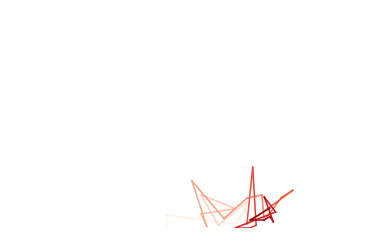

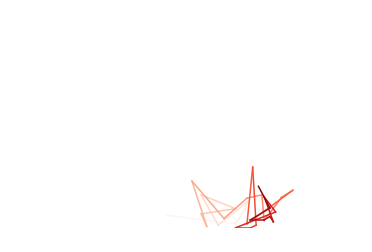

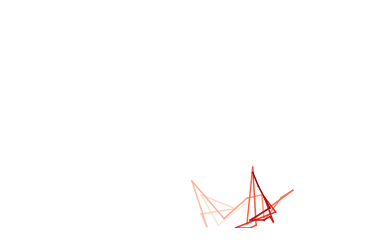

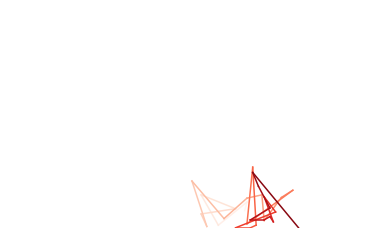

In [32]:
#This saves images for all years of interest

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.cm as cm
from datetime import date, timedelta
%matplotlib inline

saveIt = True #if you want to save the images

df = pd.read_csv('../data/whistler_weather_good.csv')

dateTime = df['Date/Time']
year = df['Year']
month = df['Month']
day = df['Day']
maxT = df['Max Temp']
meanT = df['Mean Temp']
minT = df['Min Temp']
P = df['Total Precip (mm)']

# Avalanche ratings
ar = pd.read_csv('../data/avalanche_rating_Jan_to_Mar_2012_to_2017.csv')

areaOfWeather = 'Below Treeline'
avyDates = ar['Date']
avyRatings = ar[areaOfWeather]

startYear = 2012
finalYear = 2017

inds = []
dates = []
for year in range(startYear,finalYear+1):

    startDate = str(year)+'-01-01' #YYYY-MM-DD
    finalDate = str(year)+'-03-31'

    d1 = date(int(startDate[0:4]), int(startDate[5:7]), int(startDate[8:10]))  # start date
    d2 = date(int(finalDate[0:4]), int(finalDate[6]), int(finalDate[8:10]))  # end date

    delta = d2 - d1
    dates = dates+[str(d1+timedelta(i)) for i in range(delta.days+1)] #list of dates (strings) during time range of interest
     
#get indices in weather data that correspond to these dates -- this is bulky but my MATLAB brain struggles with simple python things sometimes...
inds = [np.argwhere(dateTime==dates[i]) for i in range(len(dates))] #this is a list of arrays
inds = [inds[i].tolist() for i in range(len(inds))]
indsDummy = []
i = 0
for index in inds:
    indsDummy.append(index[0][0])
    i+=1
inds = indsDummy

#max/min values on the x/y axis need to all be the same on all images
xmin = np.nanmin([meanT[i] for i in inds])
xmax = np.nanmax([meanT[i] for i in inds])
ymin = np.nanmin([P[i] for i in inds])
ymax = np.nanmax([P[i] for i in inds])

s = 1 # Segment length -- we colour the line in segments in order to get a gradient of a colourmap across the line in time
numPrevDays = 30
n = numPrevDays
rgb = cm.get_cmap(name='Reds',lut=n)

# Training / Validation Split
trainingPrptn = 0.75
validationPrptn = 0.25

assert (trainingPrptn + validationPrptn == 1.0), "Training/validation data split does not add up to 1.0"

# Create a random selection of images that will be used for validation
numSamples = len(dates)
validationSampleInds = np.random.choice(range(numSamples), int(numSamples*validationPrptn), replace=False) 
counter = 0

for ind in inds: #for each day
    
    currDay = dateTime[ind]
    prevDayInds = range(np.subtract(ind,30)+1,ind)
    
    x = [meanT[i] for i in prevDayInds]
    y = [P[i] for i in prevDayInds]
    
    plt.subplot(1,1,1)
    for i in range(0,n,s): #this plots and colours each segment on the current plot
        plt.plot(x[i:i+s+1],y[i:i+s+1],color=rgb(i)[0:3])
        
    plt.xlim([xmin,xmax])
    plt.ylim([ymin,ymax])
    plt.axis('off')
    plt.show()
    
    # sort images into directories labelled by the day's avalanche rating
    avyInd = np.argwhere(avyDates==currDay)[0][0]
    currAvyRating = avyRatings[avyInd]
    
    if counter in validationSampleInds:
        subDir = 'validation/AR-' + str(currAvyRating) +'/'
    else:
        subDir = 'train/AR-' + str(currAvyRating) +'/'
    
    counter += 1
    
    fileDir = '../data/temp_prec_images/' + areaOfWeather + '/' + subDir
    filename = 'temp_precip_prev' + str(numPrevDays) + '_Reds_' + currDay + '_AR-' + str(currAvyRating) + '.png'
    
    if saveIt is True:
        plt.savefig(fileDir+filename)